# Flight_Delay

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

## Load the Data

In [2]:
delays_df1 = pd.read_csv('2018.csv')
delays_df1.head(2).append(delays_df1.tail(2))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,01-01-2018,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0,NaN,0,268.0,250.0,225.0,1605,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-2018,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0,NaN,0,99.0,83.0,65.0,414,NaN,NaN,NaN,NaN,NaN,NaN
1048573,26-02-2018,DL,2395,PBI,LGA,702,656.0,-6.0,12.0,708.0,916.0,13.0,1000,929.0,-31.0,0,NaN,0,178.0,153.0,128.0,1035,NaN,NaN,NaN,NaN,NaN,NaN
1048574,26-02-2018,DL,2396,ATL,RSW,1444,1441.0,-3.0,13.0,1454.0,1612.0,3.0,1625,1615.0,-10.0,0,NaN,0,101.0,94.0,78.0,515,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
delays_df1.shape

(1048575, 28)

In [4]:
delays_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   FL_DATE              1048575 non-null  object 
 1   OP_CARRIER           1048575 non-null  object 
 2   OP_CARRIER_FL_NUM    1048575 non-null  int64  
 3   ORIGIN               1048575 non-null  object 
 4   DEST                 1048575 non-null  object 
 5   CRS_DEP_TIME         1048575 non-null  int64  
 6   DEP_TIME             1023321 non-null  float64
 7   DEP_DELAY            1022413 non-null  float64
 8   TAXI_OUT             1022842 non-null  float64
 9   WHEELS_OFF           1022842 non-null  float64
 10  WHEELS_ON            1021967 non-null  float64
 11  TAXI_IN              1021967 non-null  float64
 12  CRS_ARR_TIME         1048575 non-null  int64  
 13  ARR_TIME             1021967 non-null  float64
 14  ARR_DELAY            1019683 non-null  float64
 15

# Data Pre-Processing/Cleaning

## Data Conditioning
## OP_CARRIER

In [5]:
delays_df1.OP_CARRIER.unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [6]:
delays_df1['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [7]:
delays_df1.OP_CARRIER.nunique()

18

In [8]:
delays_df1.OP_CARRIER.value_counts()

Southwest Airlines    199357
American Airlines     136811
Delta Airlines        131994
SkyWest Airlines      113967
United Airlines        82283
Republic Airways       46670
JetBlue Airways        46039
Envoy Air              41603
PSA Airlines           41214
ExpressJet             36742
Endeavor Air           33490
Mesa Airline           29899
Alaska Airlines        28349
Spirit Airlines        26217
Frontier Airlines      17511
Allegiant Air          13479
Hawaiian Airlines      12195
Virgin America         10755
Name: OP_CARRIER, dtype: int64

In [9]:
delays_df1 = delays_df1.drop(["Unnamed: 27"], axis=1)

In [10]:
delays_df1.CANCELLED.nunique()

2

In [11]:
# check how many flights got cancelled thus, we don't need to check them
# for the delay to get more accuracy. Thus, we can drop the cancelled flights! 
delays_df1.CANCELLED.value_counts() 

0    1022662
1      25913
Name: CANCELLED, dtype: int64

In [12]:
#using dummy dataframe to drop the cancelled flights' data
dummy = delays_df1[(delays_df1['CANCELLED'] == 1)]
print('dummy shape:', dummy.shape)
print('====================================')
print('dummy dataframe:')
dummy.head(3).append(dummy.tail(3))

dummy shape: (25913, 27)
dummy dataframe:


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
178,01-01-2018,United Airlines,2034,IAH,MFE,1440,NaN,NaN,NaN,NaN,NaN,NaN,1601,NaN,NaN,1,B,0,81.0,NaN,NaN,316,NaN,NaN,NaN,NaN,NaN
875,01-01-2018,United Airlines,864,LAS,SFO,1744,NaN,NaN,NaN,NaN,NaN,NaN,1926,NaN,NaN,1,A,0,102.0,NaN,NaN,414,NaN,NaN,NaN,NaN,NaN
1244,01-01-2018,United Airlines,488,MFE,IAH,1726,NaN,NaN,NaN,NaN,NaN,NaN,1844,NaN,NaN,1,B,0,78.0,NaN,NaN,316,NaN,NaN,NaN,NaN,NaN
1045941,26-02-2018,Alaska Airlines,49,ANC,ADQ,1512,NaN,NaN,NaN,NaN,NaN,NaN,1610,NaN,NaN,1,B,0,58.0,NaN,NaN,253,NaN,NaN,NaN,NaN,NaN
1045956,26-02-2018,Alaska Airlines,61,YAK,CDV,1149,NaN,NaN,NaN,NaN,NaN,NaN,1240,NaN,NaN,1,B,0,51.0,NaN,NaN,213,NaN,NaN,NaN,NaN,NaN
1046027,26-02-2018,Alaska Airlines,153,OTZ,OME,1856,NaN,NaN,NaN,NaN,NaN,NaN,1938,NaN,NaN,1,B,0,42.0,NaN,NaN,183,NaN,NaN,NaN,NaN,NaN


In [13]:
dummy.CANCELLED.nunique()

1

In [14]:
dummy.CANCELLED.value_counts()

1    25913
Name: CANCELLED, dtype: int64

In [15]:
#delete the cancelled flights
delays_df1 = delays_df1[(delays_df1['CANCELLED'] == 0)]
delays_df1.head(2)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,01-01-2018,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0,NaN,0,268.0,250.0,225.0,1605,NaN,NaN,NaN,NaN,NaN
1,01-01-2018,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0,NaN,0,99.0,83.0,65.0,414,NaN,NaN,NaN,NaN,NaN


In [16]:
delays_df1 = delays_df1.drop(['CANCELLED'], axis = 1) 

In [17]:
delays_df1.shape

(1022662, 26)

In [18]:
delays_df1.CANCELLATION_CODE.nunique()

0

In [19]:
delays_df1.CANCELLATION_CODE.value_counts()

Series([], Name: CANCELLATION_CODE, dtype: int64)

In [20]:
delays_df1.CANCELLATION_CODE.unique()

array([nan], dtype=object)

In [21]:
delays_df1 = delays_df1.drop(["CANCELLATION_CODE"], axis=1)

In [22]:
airports = pd.read_csv('airports.csv')
airports.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [23]:
airports.shape

(322, 7)

In [24]:
len(airports.IATA_CODE.unique())

322

In [25]:
airport_IATA_CODE = list(airports['IATA_CODE'])

In [26]:
len(airport_IATA_CODE)

322

In [27]:
delays_df1_ORIGIN = delays_df1.ORIGIN.unique()
delays_df1_DEST = delays_df1.DEST.unique()

In [28]:
print(type(delays_df1_ORIGIN))
print(type(delays_df1_DEST))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [29]:
delays_df1_ORIGIN = delays_df1_ORIGIN.tolist()
delays_df1_DEST = delays_df1_DEST.tolist()

In [30]:
print(type(delays_df1_ORIGIN))
print(type(delays_df1_DEST))

<class 'list'>
<class 'list'>


In [31]:
print(len(delays_df1_ORIGIN))
print(len(delays_df1_DEST))

337
337


In [32]:
# differences between df1_ORIGIN and airport_IATA_CODE
difference_1 = [item for item in airport_IATA_CODE if item not in delays_df1_ORIGIN]
difference_1

['ACK',
 'AKN',
 'CEC',
 'CLD',
 'CNY',
 'DIK',
 'DLG',
 'GST',
 'HYA',
 'ILG',
 'MVY',
 'UST',
 'VEL',
 'WYS']

In [33]:
difference_2 = [item for item in delays_df1_ORIGIN if item not in airport_IATA_CODE]
difference_2

['SFB',
 'PIE',
 'BLV',
 'HGR',
 'RFD',
 'OWB',
 'HTS',
 'PGD',
 'USA',
 'LCK',
 'AZA',
 'OGD',
 'PVU',
 'YNG',
 'SCK',
 'SWO',
 'HVN',
 'STS',
 'IFP',
 'CKB',
 'CGI',
 'UIN',
 'PSM',
 'OGS',
 'LYH',
 'BFF',
 'LBF',
 'LBL',
 'FLO']

In [34]:
len(difference_2)

29

In [35]:
difference_3 = [item for item in delays_df1_DEST if item not in airport_IATA_CODE]
difference_4 = [item for item in airport_IATA_CODE if item not in delays_df1_DEST]
print(type(difference_3))
print(type(difference_4))

<class 'list'>
<class 'list'>


In [36]:
# These are the 14 rows that will need to be eliminated from the original airport_IATA_CODE list/dataframe
print(difference_1)
print(difference_4)

['ACK', 'AKN', 'CEC', 'CLD', 'CNY', 'DIK', 'DLG', 'GST', 'HYA', 'ILG', 'MVY', 'UST', 'VEL', 'WYS']
['ACK', 'AKN', 'CEC', 'CLD', 'CNY', 'DIK', 'DLG', 'GST', 'HYA', 'ILG', 'MVY', 'UST', 'VEL', 'WYS']


In [37]:
# Now let's try to see if the differences between 

difference_2_3 = [item for item in difference_2 if item not in difference_3]
difference_2_3

[]

In [38]:
missing_airports = pd.DataFrame(difference_2, columns=['IATA_CODE'])
print('missing_airports type is:', type(missing_airports))
print('===============================================================')
print('Dataframe difference_2 shape:', missing_airports.shape)
print('===============================================================')
missing_airports.head(3).append(missing_airports.tail(3))

missing_airports type is: <class 'pandas.core.frame.DataFrame'>
Dataframe difference_2 shape: (29, 1)


,IATA_CODE
0,SFB
1,PIE
2,BLV
26,LBF
27,LBL
28,FLO


In [39]:
missing_airports.to_csv('missing_airports.csv')

In [40]:
missing_airports = pd.read_excel('missing_airports_filled.xlsx', index_col=0)
print(missing_airports.shape)
missing_airports.head(3).append(missing_airports.tail(2))

(29, 7)


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,SFB,Orlando Sanford International Airport,Orlando,Florida,USA,28.777599,-81.237503
1,PIE,St Petersburg Clearwater International Airport,St Petersburg-Clearwater,Florida,USA,27.910200,-82.687401
2,BLV,Scott AFB/Midamerica Airport,Belleville,Illinois,USA,38.545200,-89.835198
27,LBL,Liberal Mid-America Regional Airport,Liberal,Kansas,USA,37.046465,-100.961493
28,FLO,Florence Regional Airport,Florence,South Carolina,USA,34.193472,-79.728353


In [41]:
print(airports.shape)
airports.head(3)

(322, 7)


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919


In [42]:
airports = airports[airports.IATA_CODE != 'ACK']
airports = airports[airports.IATA_CODE != 'AKN']
airports = airports[airports.IATA_CODE != 'CEC']
airports = airports[airports.IATA_CODE != 'CLD']
airports = airports[airports.IATA_CODE != 'CNY']
airports = airports[airports.IATA_CODE != 'DIK']
airports = airports[airports.IATA_CODE != 'DLG']

airports = airports[airports.IATA_CODE != 'GST']
airports = airports[airports.IATA_CODE != 'HYA']
airports = airports[airports.IATA_CODE != 'ILG']

airports = airports[airports.IATA_CODE != 'DIK']
airports = airports[airports.IATA_CODE != 'UST']

airports = airports[airports.IATA_CODE != 'VEL']
airports = airports[airports.IATA_CODE != 'WYS']

In [43]:
airports.shape

(309, 7)

In [44]:
# Appending the missing_airports dataframe to the larger airports dataframe
AIRPORTS = airports.append(missing_airports, ignore_index=True)
AIRPORTS.shape

(338, 7)

In [45]:
# Now a quick visualization of the first and last 2 rows
AIRPORTS.head(2).append(AIRPORTS.tail(2))

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.652360,-75.440400
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.411320,-99.681900
336,LBL,Liberal Mid-America Regional Airport,Liberal,Kansas,USA,37.046465,-100.961493
337,FLO,Florence Regional Airport,Florence,South Carolina,USA,34.193472,-79.728353


In [46]:
print('Number of cities with at least one airport:', AIRPORTS.CITY.nunique())
print('================================================')
print('Total number of airports:', AIRPORTS.IATA_CODE.nunique())
print('================================================')

Number of cities with at least one airport: 322
Total number of airports: 338


In [47]:
# Creating a dictionary and looking at its type for QC purposes
airport_dict = pd.Series(AIRPORTS.CITY.values, index=AIRPORTS.IATA_CODE).to_dict()
print(type(airport_dict))

<class 'dict'>


In [48]:
delays_df1['ORIGIN'].replace(airport_dict, inplace=True)
delays_df1['DEST'].replace(airport_dict, inplace=True)
delays_df1.head(3).append(delays_df1.tail(3))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,01-01-2018,United Airlines,2429,Newark,Denver,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0,268.0,250.0,225.0,1605,NaN,NaN,NaN,NaN,NaN
1,01-01-2018,United Airlines,2427,Las Vegas,San Francisco,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0,99.0,83.0,65.0,414,NaN,NaN,NaN,NaN,NaN
2,01-01-2018,United Airlines,2426,Santa Ana,Denver,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0,134.0,126.0,106.0,846,NaN,NaN,NaN,NaN,NaN
1048572,26-02-2018,Delta Airlines,2394,Atlanta,Philadelphia,1842,1850.0,8.0,20.0,1910.0,2038.0,4.0,2045,2042.0,-3.0,0,123.0,112.0,88.0,666,NaN,NaN,NaN,NaN,NaN
1048573,26-02-2018,Delta Airlines,2395,West Palm Beach,New York,702,656.0,-6.0,12.0,708.0,916.0,13.0,1000,929.0,-31.0,0,178.0,153.0,128.0,1035,NaN,NaN,NaN,NaN,NaN
1048574,26-02-2018,Delta Airlines,2396,Atlanta,Ft. Myers,1444,1441.0,-3.0,13.0,1454.0,1612.0,3.0,1625,1615.0,-10.0,0,101.0,94.0,78.0,515,NaN,NaN,NaN,NaN,NaN


In [49]:
print('Total number of departure/origin cities:', delays_df1.ORIGIN.nunique())
print('==================================================')
print('Total number of arrivals/destinations cities:', delays_df1.DEST.nunique())
print('==================================================')

Total number of departure/origin cities: 321
Total number of arrivals/destinations cities: 321


In [50]:
delays_df1.DIVERTED.value_counts()

0    1020085
1       2577
Name: DIVERTED, dtype: int64

In [51]:
DIVERTED_1 = delays_df1['DIVERTED']==1

In [52]:
delays_df1_DIV = delays_df1[DIVERTED_1]
print(delays_df1_DIV.shape)

(2577, 25)


In [53]:
delays_df1_DIV.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
1168,01-01-2018,United Airlines,555,San Francisco,San Diego,729,718.0,-11.0,17.0,735.0,1124.0,3.0,903,1127.0,NaN,1,94.0,NaN,NaN,447,NaN,NaN,NaN,NaN,NaN
1638,01-01-2018,Alaska Airlines,64,Petersburg,Wrangell,1514,1626.0,72.0,20.0,1646.0,NaN,NaN,1538,NaN,NaN,1,24.0,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN
1643,01-01-2018,Alaska Airlines,65,Ketchikan,Wrangell,925,918.0,-7.0,26.0,944.0,NaN,NaN,1011,NaN,NaN,1,46.0,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN
1683,01-01-2018,Alaska Airlines,120,Seattle,San Diego,550,544.0,-6.0,18.0,602.0,1046.0,3.0,840,1049.0,NaN,1,170.0,NaN,NaN,1050,NaN,NaN,NaN,NaN,NaN
1850,01-01-2018,Alaska Airlines,512,Seattle,San Diego,725,722.0,-3.0,16.0,738.0,1216.0,3.0,1017,1219.0,NaN,1,172.0,NaN,NaN,1050,NaN,NaN,NaN,NaN,NaN


In [54]:
delays_df1_DIV.ARR_DELAY.nunique()

0

In [55]:
delays_df1_DIV.ARR_DELAY.unique()

array([nan])

In [56]:
delays_df1_DIV.AIR_TIME.nunique()

0

In [57]:
delays_df1 = delays_df1.drop(['DIVERTED'], axis=1)
delays_df1.head(3)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,01-01-2018,United Airlines,2429,Newark,Denver,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,268.0,250.0,225.0,1605,NaN,NaN,NaN,NaN,NaN
1,01-01-2018,United Airlines,2427,Las Vegas,San Francisco,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,99.0,83.0,65.0,414,NaN,NaN,NaN,NaN,NaN
2,01-01-2018,United Airlines,2426,Santa Ana,Denver,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,134.0,126.0,106.0,846,NaN,NaN,NaN,NaN,NaN


In [58]:
delays_df1.shape

(1022662, 24)

In [59]:
print(delays_df1.CARRIER_DELAY.isna().sum())
print(delays_df1.WEATHER_DELAY.isna().sum())
print(delays_df1.NAS_DELAY.isna().sum())
print(delays_df1.SECURITY_DELAY.isna().sum())
print(delays_df1.LATE_AIRCRAFT_DELAY.isna().sum())

833144
833144
833144
833144
833144


In [60]:
print("Percentage of valid data:", 100 - (delays_df1.CARRIER_DELAY.isna().sum()*100/len(delays_df1)))
print("Percentage of missing values:", (delays_df1.CARRIER_DELAY.isna().sum()*100/len(delays_df1)))

Percentage of valid data: 18.531831631565467
Percentage of missing values: 81.46816836843453


In [61]:
#drop these 5 columns then
delays_df1 = delays_df1.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1)
print('The current shape of df1 is:', delays_df1.shape)
delays_df1.head(3).append(delays_df1.tail(3))

The current shape of df1 is: (1022662, 19)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,01-01-2018,United Airlines,2429,Newark,Denver,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,268.0,250.0,225.0,1605
1,01-01-2018,United Airlines,2427,Las Vegas,San Francisco,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,99.0,83.0,65.0,414
2,01-01-2018,United Airlines,2426,Santa Ana,Denver,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,134.0,126.0,106.0,846
1048572,26-02-2018,Delta Airlines,2394,Atlanta,Philadelphia,1842,1850.0,8.0,20.0,1910.0,2038.0,4.0,2045,2042.0,-3.0,123.0,112.0,88.0,666
1048573,26-02-2018,Delta Airlines,2395,West Palm Beach,New York,702,656.0,-6.0,12.0,708.0,916.0,13.0,1000,929.0,-31.0,178.0,153.0,128.0,1035
1048574,26-02-2018,Delta Airlines,2396,Atlanta,Ft. Myers,1444,1441.0,-3.0,13.0,1454.0,1612.0,3.0,1625,1615.0,-10.0,101.0,94.0,78.0,515


In [62]:
delays_df1 = delays_df1.drop(['OP_CARRIER_FL_NUM'], axis=1)
delays_df1.head(3)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,01-01-2018,United Airlines,Newark,Denver,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,268.0,250.0,225.0,1605
1,01-01-2018,United Airlines,Las Vegas,San Francisco,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,99.0,83.0,65.0,414
2,01-01-2018,United Airlines,Santa Ana,Denver,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,134.0,126.0,106.0,846


In [63]:
delays_df1.drop(columns=['DEP_TIME', 'ARR_TIME'], inplace=True)
delays_df1.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,01-01-2018,United Airlines,Newark,Denver,1517,-5.0,15.0,1527.0,1712.0,10.0,1745,-23.0,268.0,250.0,225.0,1605
1,01-01-2018,United Airlines,Las Vegas,San Francisco,1115,-8.0,11.0,1118.0,1223.0,7.0,1254,-24.0,99.0,83.0,65.0,414


In [64]:
#copy of the preprocessed dataframe here
delays_df1.to_csv('df1.csv')

In [65]:
delays_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022662 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   FL_DATE              1022662 non-null  object 
 1   OP_CARRIER           1022662 non-null  object 
 2   ORIGIN               1022662 non-null  object 
 3   DEST                 1022662 non-null  object 
 4   CRS_DEP_TIME         1022662 non-null  int64  
 5   DEP_DELAY            1021770 non-null  float64
 6   TAXI_OUT             1022662 non-null  float64
 7   WHEELS_OFF           1022662 non-null  float64
 8   WHEELS_ON            1021967 non-null  float64
 9   TAXI_IN              1021967 non-null  float64
 10  CRS_ARR_TIME         1022662 non-null  int64  
 11  ARR_DELAY            1019683 non-null  float64
 12  CRS_ELAPSED_TIME     1022655 non-null  float64
 13  ACTUAL_ELAPSED_TIME  1020085 non-null  float64
 14  AIR_TIME             1020085 non-null  float64
 15

In [66]:
delays_df1.isna().sum()

FL_DATE                   0
OP_CARRIER                0
ORIGIN                    0
DEST                      0
CRS_DEP_TIME              0
DEP_DELAY               892
TAXI_OUT                  0
WHEELS_OFF                0
WHEELS_ON               695
TAXI_IN                 695
CRS_ARR_TIME              0
ARR_DELAY              2979
CRS_ELAPSED_TIME          7
ACTUAL_ELAPSED_TIME    2577
AIR_TIME               2577
DISTANCE                  0
dtype: int64

In [67]:
print('Number of total missing values:', delays_df1.isna().sum().sum())
print('df1 shape:', delays_df1.shape)

Number of total missing values: 10422
df1 shape: (1022662, 16)


In [68]:
#new dataframe with only those rows that have at least one missing values
df_NaN = delays_df1.loc[delays_df1.isnull().any(axis=1)]
df_NaN.head(20)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
1168,01-01-2018,United Airlines,San Francisco,San Diego,729,-11.0,17.0,735.0,1124.0,3.0,903,NaN,94.0,NaN,NaN,447
1638,01-01-2018,Alaska Airlines,Petersburg,Wrangell,1514,72.0,20.0,1646.0,NaN,NaN,1538,NaN,24.0,NaN,NaN,31
1643,01-01-2018,Alaska Airlines,Ketchikan,Wrangell,925,-7.0,26.0,944.0,NaN,NaN,1011,NaN,46.0,NaN,NaN,82
1683,01-01-2018,Alaska Airlines,Seattle,San Diego,550,-6.0,18.0,602.0,1046.0,3.0,840,NaN,170.0,NaN,NaN,1050
1850,01-01-2018,Alaska Airlines,Seattle,San Diego,725,-3.0,16.0,738.0,1216.0,3.0,1017,NaN,172.0,NaN,NaN,1050
1886,01-01-2018,Alaska Airlines,Portland,San Diego,625,6.0,17.0,648.0,1147.0,4.0,852,NaN,147.0,NaN,NaN,933
1958,01-01-2018,Alaska Airlines,Salt Lake City,San Diego,600,-6.0,31.0,625.0,1031.0,3.0,708,NaN,128.0,NaN,NaN,626
2000,01-01-2018,Alaska Airlines,Baltimore,San Diego,625,1.0,9.0,635.0,1111.0,4.0,905,NaN,340.0,NaN,NaN,2295
2102,01-01-2018,Endeavor Air,Cleveland,Detroit,630,-5.0,39.0,704.0,731.0,8.0,739,NaN,69.0,74.0,27.0,95
2124,01-01-2018,Endeavor Air,Dallas-Fort Worth,New York,900,NaN,16.0,916.0,1303.0,6.0,1334,-25.0,214.0,189.0,167.0,1391


In [69]:
df_NaN.shape

(3849, 16)

In [70]:
percentage_NaN = (len(df_NaN)*100)/len(delays_df1)
print('Percentage of rows with at least 1 NaN value:', percentage_NaN)

Percentage of rows with at least 1 NaN value: 0.376370687480321


In [71]:
delays_df1["DEP_DELAY"] = delays_df1["DEP_DELAY"].fillna(0)
delays_df1.isna().sum()

FL_DATE                   0
OP_CARRIER                0
ORIGIN                    0
DEST                      0
CRS_DEP_TIME              0
DEP_DELAY                 0
TAXI_OUT                  0
WHEELS_OFF                0
WHEELS_ON               695
TAXI_IN                 695
CRS_ARR_TIME              0
ARR_DELAY              2979
CRS_ELAPSED_TIME          7
ACTUAL_ELAPSED_TIME    2577
AIR_TIME               2577
DISTANCE                  0
dtype: int64

In [72]:
delays_df1['TAXI_IN'].fillna((delays_df1['TAXI_IN'].mean()), inplace=True)
df_NaN['TAXI_IN'].fillna((df_NaN['TAXI_IN'].mean()), inplace=True)

In [73]:
df_NaN.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
1168,01-01-2018,United Airlines,San Francisco,San Diego,729,-11.0,17.0,735.0,1124.0,3.000000,903,NaN,94.0,NaN,NaN,447
1638,01-01-2018,Alaska Airlines,Petersburg,Wrangell,1514,72.0,20.0,1646.0,NaN,8.233672,1538,NaN,24.0,NaN,NaN,31
1643,01-01-2018,Alaska Airlines,Ketchikan,Wrangell,925,-7.0,26.0,944.0,NaN,8.233672,1011,NaN,46.0,NaN,NaN,82
1683,01-01-2018,Alaska Airlines,Seattle,San Diego,550,-6.0,18.0,602.0,1046.0,3.000000,840,NaN,170.0,NaN,NaN,1050
1850,01-01-2018,Alaska Airlines,Seattle,San Diego,725,-3.0,16.0,738.0,1216.0,3.000000,1017,NaN,172.0,NaN,NaN,1050


In [74]:
delays_df1.TAXI_IN.isna().sum()

0

In [75]:
delays_df1.isna().sum()

FL_DATE                   0
OP_CARRIER                0
ORIGIN                    0
DEST                      0
CRS_DEP_TIME              0
DEP_DELAY                 0
TAXI_OUT                  0
WHEELS_OFF                0
WHEELS_ON               695
TAXI_IN                   0
CRS_ARR_TIME              0
ARR_DELAY              2979
CRS_ELAPSED_TIME          7
ACTUAL_ELAPSED_TIME    2577
AIR_TIME               2577
DISTANCE                  0
dtype: int64

In [76]:
delays_df1 = delays_df1.dropna()

In [77]:
delays_df1.shape

(1019683, 16)

In [78]:
delays_df1.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

In [79]:
delays_df1.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,01-01-2018,United Airlines,Newark,Denver,1517,-5.0,15.0,1527.0,1712.0,10.0,1745,-23.0,268.0,250.0,225.0,1605
1,01-01-2018,United Airlines,Las Vegas,San Francisco,1115,-8.0,11.0,1118.0,1223.0,7.0,1254,-24.0,99.0,83.0,65.0,414


In [80]:
delays_df1['CRS_DEP_TIME'] = np.ceil(delays_df1['CRS_DEP_TIME']/600).apply(int)
delays_df1['WHEELS_OFF'] = np.ceil(delays_df1['WHEELS_OFF']/600).apply(int) 
delays_df1['WHEELS_ON'] = np.ceil(delays_df1['WHEELS_ON']/600).apply(int)
delays_df1['CRS_ARR_TIME'] = np.ceil(delays_df1['CRS_ARR_TIME']/600).apply(int)

In [81]:
delays_df1.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,01-01-2018,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605
1,01-01-2018,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414
2,01-01-2018,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846
3,01-01-2018,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120
4,01-01-2018,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,112.0,106.0,83.0,723


## Date Format

In [82]:
delays_df1['DAY'] = pd.DatetimeIndex(delays_df1['FL_DATE']).day
delays_df1['MONTH'] = pd.DatetimeIndex(delays_df1['FL_DATE']).month
delays_df1.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH
0,01-01-2018,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605,1,1
1,01-01-2018,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414,1,1


In [83]:
print('Maximum number of days in a month:', delays_df1.DAY.nunique())
print('Total number of months:', delays_df1.MONTH.nunique())

Maximum number of days in a month: 21
Total number of months: 12


In [84]:
import calendar
delays_df1['MONTH_AB'] = delays_df1['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [85]:
delays_df1.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB
0,01-01-2018,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605,1,1,Jan
1,01-01-2018,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414,1,1,Jan


In [86]:
print('Months present in dataframe:', delays_df1.MONTH.unique())
print('Months present in dataframe:', delays_df1.MONTH_AB.unique())

Months present in dataframe: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months present in dataframe: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


## Binary Classsification

In [87]:
status = []

for value in delays_df1['ARR_DELAY']:
    if value < 0:
        status.append(0)
    else:
        status.append(1)
delays_df1['FLIGHT_STATUS'] = status
delays_df1.head(2)   

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,01-01-2018,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605,1,1,Jan,0
1,01-01-2018,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414,1,1,Jan,0


In [88]:
delays_df1.FLIGHT_STATUS.value_counts(normalize=True)

0    0.644327
1    0.355673
Name: FLIGHT_STATUS, dtype: float64

In [89]:
# 64.4% of the flights have no delays

In [90]:
delays_df1.to_csv('df1.csv')

In [91]:
delays_df1.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
DAY                    0
MONTH                  0
MONTH_AB               0
FLIGHT_STATUS          0
dtype: int64

In [92]:
##---------------------------------------------------

In [93]:
#Dataframe used fo rmodeling (same as delays_df1 with top 20 destinations on numbers of flights)
df = pd.read_csv('df1.csv', index_col=0)
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,01-01-2018,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605,1,1,Jan,0
1,01-01-2018,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414,1,1,Jan,0
2,01-01-2018,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846,1,1,Jan,0
3,01-01-2018,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120,1,1,Jan,0
4,01-01-2018,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,112.0,106.0,83.0,723,1,1,Jan,1


In [94]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['WEEKDAY'] = df['FL_DATE'].dt.dayofweek

In [95]:
df.WEEKDAY.value_counts()

0    162374
6    159272
3    153008
4    145367
1    141522
5    129621
2    128519
Name: WEEKDAY, dtype: int64

In [96]:
df.head(3)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,WEEKDAY
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605,1,1,Jan,0,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414,1,1,Jan,0,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846,1,1,Jan,0,0


In [97]:
#Preprocessing for Modeling dataframe on top of delays_df1 dataframe
df.DEST.value_counts().iloc[:20]

Chicago              56313
Atlanta              55227
New York             41430
Dallas-Fort Worth    39986
Houston              33301
Charlotte            32833
Denver               32672
Los Angeles          32172
Phoenix              27170
San Francisco        25353
Las Vegas            24020
Orlando              22603
Detroit              22071
Minneapolis          21333
Newark               20331
Boston               19579
Seattle              19340
Arlington            19285
Salt Lake City       16952
Philadelphia         15793
Name: DEST, dtype: int64

In [98]:
top_cities = df.DEST.value_counts().iloc[0:20].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,Chicago,56313
1,Atlanta,55227
2,New York,41430
3,Dallas-Fort Worth,39986
4,Houston,33301


In [99]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

array(['Chicago', 'Atlanta', 'New York', 'Dallas-Fort Worth', 'Houston',
       'Charlotte', 'Denver', 'Los Angeles', 'Phoenix', 'San Francisco',
       'Las Vegas', 'Orlando', 'Detroit', 'Minneapolis', 'Newark',
       'Boston', 'Seattle', 'Arlington', 'Salt Lake City', 'Philadelphia'],
      dtype=object)

In [100]:
# Creating a list with top 20 cities only:
city_list = top_cities['DEST'].tolist()

In [101]:
# Checking the list's content
city_list

['Chicago',
 'Atlanta',
 'New York',
 'Dallas-Fort Worth',
 'Houston',
 'Charlotte',
 'Denver',
 'Los Angeles',
 'Phoenix',
 'San Francisco',
 'Las Vegas',
 'Orlando',
 'Detroit',
 'Minneapolis',
 'Newark',
 'Boston',
 'Seattle',
 'Arlington',
 'Salt Lake City',
 'Philadelphia']

In [102]:
#dataframe for modeling
boolean_series = df.DEST.isin(city_list)
dfm = df[boolean_series]
dfm.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,WEEKDAY
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605,1,1,Jan,0,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414,1,1,Jan,0,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846,1,1,Jan,0,0
3,2018-01-01,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120,1,1,Jan,0,0
6,2018-01-01,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222,1,1,Jan,0,0


In [103]:
dfm.DEST.unique()

array(['Denver', 'San Francisco', 'Chicago', 'Las Vegas', 'Newark',
       'Atlanta', 'Los Angeles', 'Houston', 'Salt Lake City', 'Orlando',
       'Detroit', 'Charlotte', 'Boston', 'Phoenix', 'Minneapolis',
       'Dallas-Fort Worth', 'New York', 'Philadelphia', 'Arlington',
       'Seattle'], dtype=object)

In [104]:
dfm.shape # New dataframe ready reduced to almost half the size of the original one

(577764, 21)

In [105]:
df.shape # Previous dataframe before this final filter

(1019683, 21)

In [106]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577764 entries, 0 to 1048573
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FL_DATE              577764 non-null  datetime64[ns]
 1   OP_CARRIER           577764 non-null  object        
 2   ORIGIN               577764 non-null  object        
 3   DEST                 577764 non-null  object        
 4   CRS_DEP_TIME         577764 non-null  int64         
 5   DEP_DELAY            577764 non-null  float64       
 6   TAXI_OUT             577764 non-null  float64       
 7   WHEELS_OFF           577764 non-null  int64         
 8   WHEELS_ON            577764 non-null  int64         
 9   TAXI_IN              577764 non-null  float64       
 10  CRS_ARR_TIME         577764 non-null  int64         
 11  ARR_DELAY            577764 non-null  float64       
 12  CRS_ELAPSED_TIME     577764 non-null  float64       
 13  ACTUAL_ELAPSE

In [107]:
dfm = dfm.drop(columns=['FL_DATE', 'MONTH_AB'])

In [108]:
dfm.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
0,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605,1,1,0,0
1,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414,1,1,0,0
2,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846,1,1,0,0
3,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120,1,1,0,0
6,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222,1,1,0,0


In [109]:
dfm.shape

(577764, 19)

In [110]:
dfm.to_csv('dfm.csv')

## Collinearity 

In [111]:
dfm.corr()

,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
CRS_DEP_TIME,1.000000,0.061138,-0.075165,0.903584,0.614490,-0.016838,0.625455,0.044679,0.059438,0.050970,0.064186,0.066087,-0.000058,0.000042,0.071694,0.002618
DEP_DELAY,0.061138,1.000000,0.063553,0.123165,0.068974,0.012760,0.060953,0.956721,-0.015126,-0.009027,-0.019470,-0.017598,-0.066701,0.058917,0.383420,-0.013982
TAXI_OUT,-0.075165,0.063553,1.000000,-0.028246,-0.041778,0.022697,-0.058922,0.234741,0.046790,0.166072,0.022584,0.006674,-0.022553,0.030309,0.329139,-0.040667
WHEELS_OFF,0.903584,0.123165,-0.028246,1.000000,0.667320,-0.010975,0.655875,0.112410,0.038508,0.035946,0.041611,0.038784,-0.006877,0.007936,0.128014,-0.001684
WHEELS_ON,0.614490,0.068974,-0.041778,0.667320,1.000000,0.009468,0.897089,0.062336,0.036142,0.034426,0.040255,0.031887,0.003252,0.001077,0.090307,-0.001786
TAXI_IN,-0.016838,0.012760,0.022697,-0.010975,0.009468,1.000000,0.006021,0.110757,0.022645,0.090053,0.002094,-0.005047,-0.024031,0.018343,0.157493,-0.008570
CRS_ARR_TIME,0.625455,0.060953,-0.058922,0.655875,0.897089,0.006021,1.000000,0.047860,0.042577,0.036242,0.044878,0.038320,0.002332,0.001288,0.072471,0.001296
ARR_DELAY,0.044679,0.956721,0.234741,0.112410,0.062336,0.110757,0.047860,1.000000,-0.056653,0.006405,-0.036951,-0.054582,-0.072197,0.069279,0.506550,-0.024379
CRS_ELAPSED_TIME,0.059438,-0.015126,0.046790,0.038508,0.036142,0.022645,0.042577,-0.056653,1.000000,0.980588,0.989257,0.977340,-0.006800,0.000945,-0.032228,0.006965
ACTUAL_ELAPSED_TIME,0.050970,-0.009027,0.166072,0.035946,0.034426,0.090053,0.036242,0.006405,0.980588,1.000000,0.985965,0.960721,-0.012982,0.010105,0.064982,-0.000545


In [112]:
abs(dfm.corr())>.75

,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
CRS_DEP_TIME,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
DEP_DELAY,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
TAXI_OUT,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
WHEELS_OFF,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
WHEELS_ON,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
TAXI_IN,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
CRS_ARR_TIME,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
ARR_DELAY,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
CRS_ELAPSED_TIME,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False
ACTUAL_ELAPSED_TIME,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False


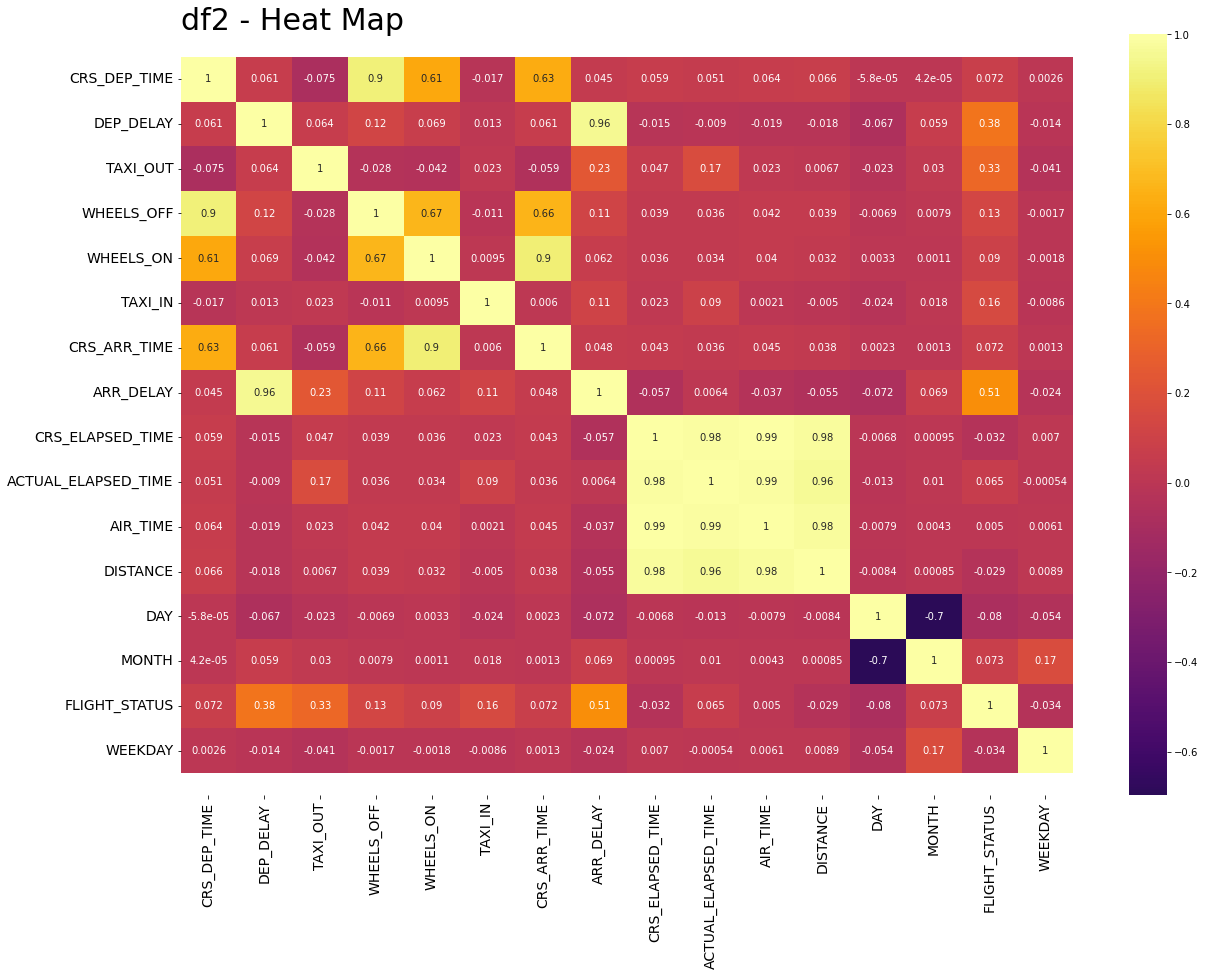

In [113]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(dfm.corr(), cmap='inferno', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df2 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

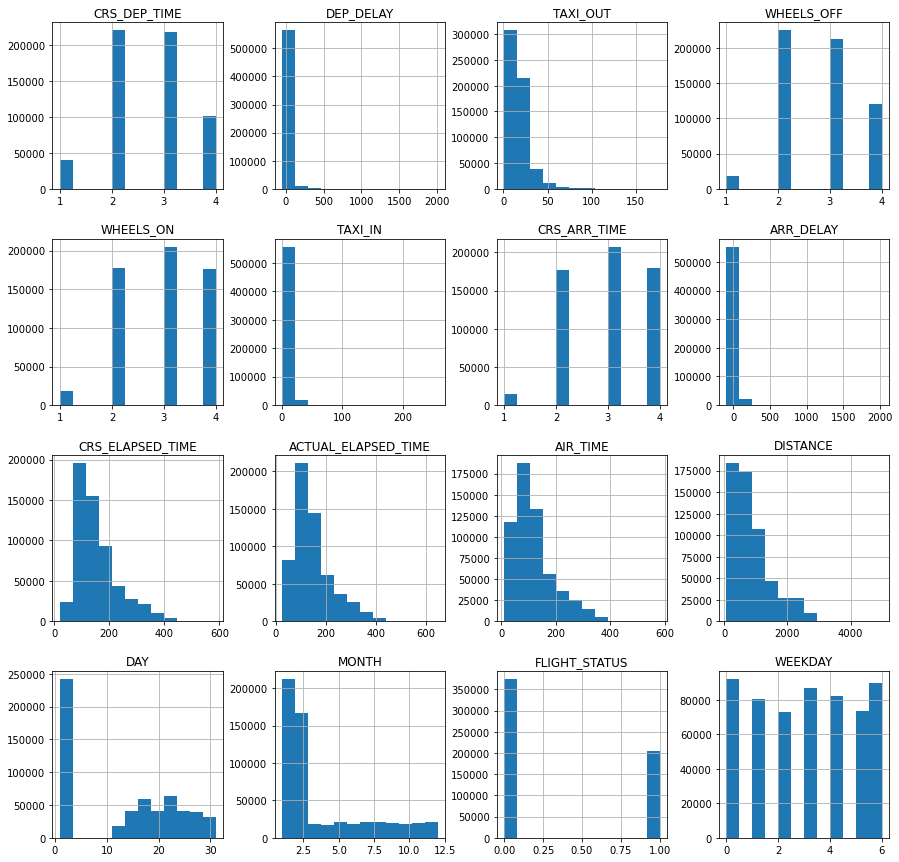

In [114]:
dfm.hist(figsize  = [15, 15],bins=12) 
plt.show()

In [115]:
dfm_jan = dfm[(dfm['MONTH'] == 1)]
dfm_jan.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
0,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605,1,1,0,0
1,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414,1,1,0,0
2,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846,1,1,0,0
3,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120,1,1,0,0
6,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222,1,1,0,0


In [116]:
dfm_jan.MONTH.value_counts()

1    211814
Name: MONTH, dtype: int64

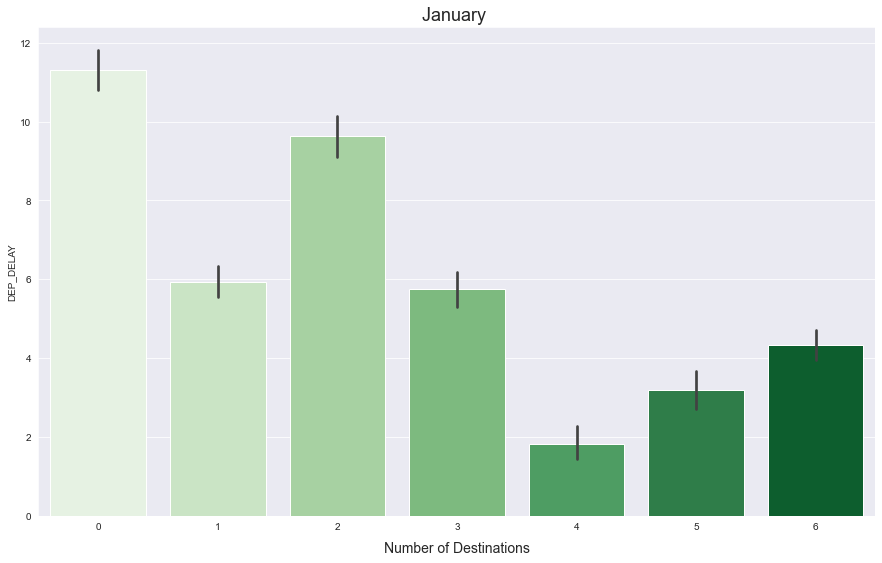

In [117]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="WEEKDAY", y="DEP_DELAY", data=dfm_jan, palette="Greens")
plt.title('January ', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()

In [118]:
df1 = delays_df1[['FL_DATE', 'DAY', 'MONTH', 'MONTH_AB', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
           'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 
           'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 
           'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FLIGHT_STATUS']]
df1.head(2)

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,01-01-2018,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605,0
1,01-01-2018,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414,0


## Visualizations - Single Plots
## Total Number of Flights per Airline

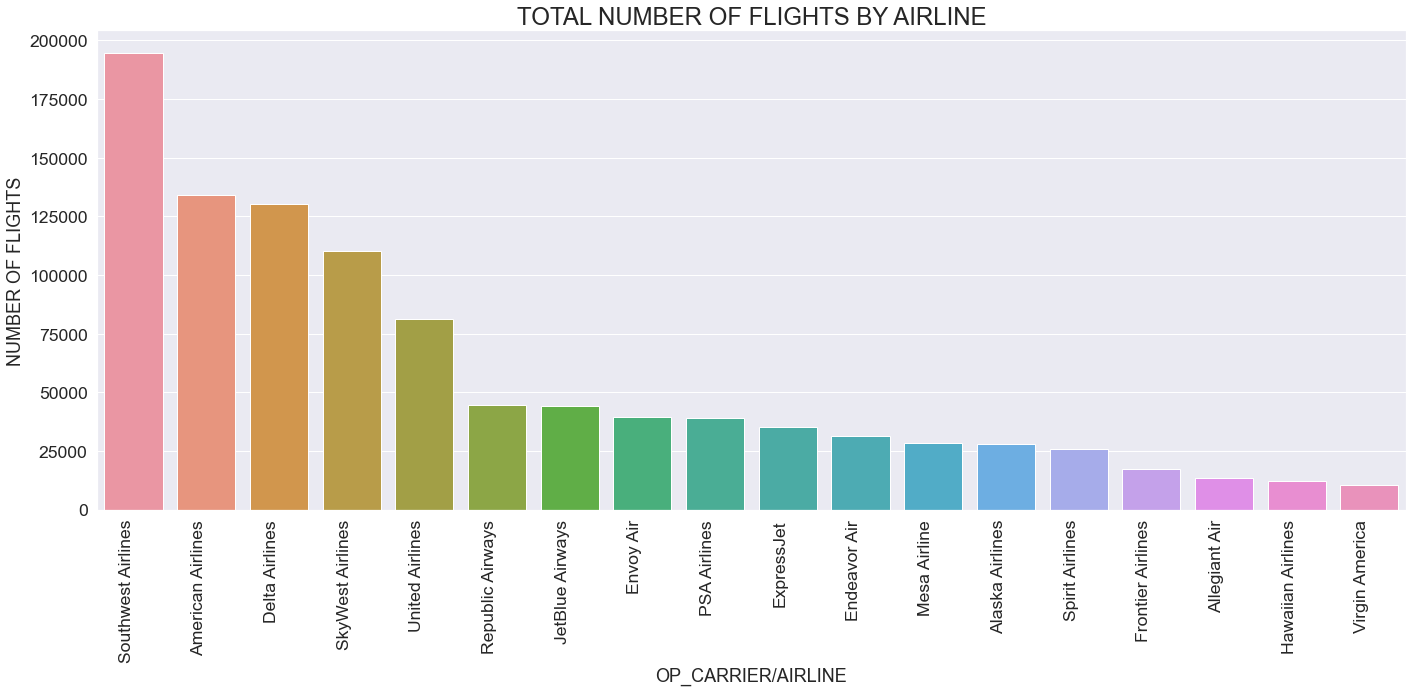

In [119]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['OP_CARRIER'], data=df1, order=df1['OP_CARRIER'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('OP_CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In [120]:
df1.OP_CARRIER.value_counts()

Southwest Airlines    194587
American Airlines     134245
Delta Airlines        130151
SkyWest Airlines      110347
United Airlines        81059
Republic Airways       44767
JetBlue Airways        44074
Envoy Air              39388
PSA Airlines           38990
ExpressJet             35241
Endeavor Air           31468
Mesa Airline           28415
Alaska Airlines        28056
Spirit Airlines        25643
Frontier Airlines      17190
Allegiant Air          13346
Hawaiian Airlines      12150
Virgin America         10566
Name: OP_CARRIER, dtype: int64

## Number of Delayed Flights by Airline

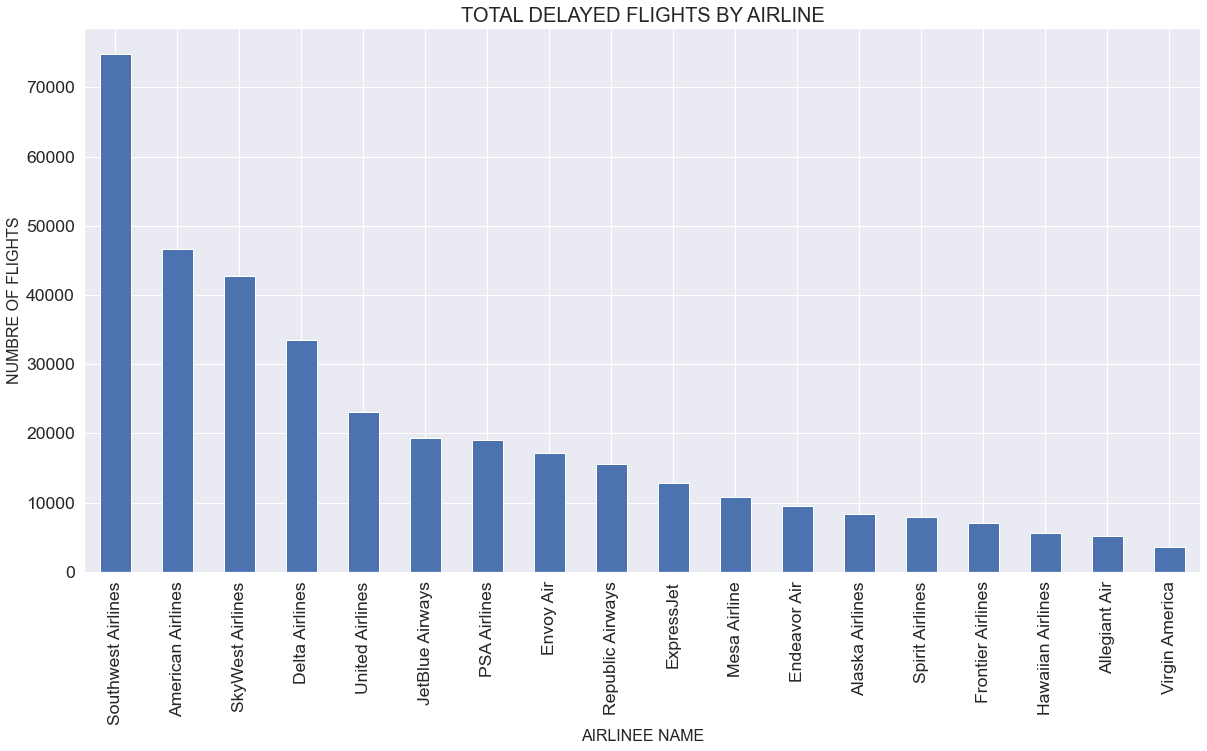

In [121]:
plt.figure(figsize=(20, 10))
df1.groupby('OP_CARRIER').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

## Percentage of delayed flights per airline

In [122]:
df1.FLIGHT_STATUS.value_counts(normalize=True)

0    0.644327
1    0.355673
Name: FLIGHT_STATUS, dtype: float64

In [123]:
# 1. Creating the new dataframe with the columns of my interest
df1_PFD = df1[['OP_CARRIER', 'FLIGHT_STATUS']]
df1_PFD.head()

,OP_CARRIER,FLIGHT_STATUS
0,United Airlines,0
1,United Airlines,0
2,United Airlines,0
3,United Airlines,0
4,United Airlines,1


In [124]:
# 2. Shape to check the size of the dataframe and that we have not lost any rows for any reason
df1_PFD.shape

(1019683, 2)

In [125]:
# 3. Non-normalize value_count()
df1_PFD.FLIGHT_STATUS.value_counts()

0    657009
1    362674
Name: FLIGHT_STATUS, dtype: int64

In [126]:
# 4. Create another dataframe (test_1) grouping the airline names and adding all the FLIGHT_STATUS values
# This way you will obtain all the delayed flights
test_1 = df1_PFD.groupby(['OP_CARRIER']).sum().reset_index()

# 5. Create another dataframe (test_2) from the value_counts directly so that it has all the flights added per airline
# Rename the axis to OP_CARRIER and reset_index to TOTAL_FLIGHTS
test_2 = df1.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='TOTAL_FLIGHTS')

# 6. Merge the two dataframes (test_1 and test_2) using the OP_CARRIER as the common column
df_fp = pd.merge(test_1, test_2, on='OP_CARRIER')

# 7. Create a new column that will represent the percentage of delay flights
df_fp['PERCENTAGE_DELAYED'] = round((df_fp['FLIGHT_STATUS']*100)/df_fp['TOTAL_FLIGHTS'], 2)
df_fp.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)

# 8. Display the entire dataframe
df_fp.head(20)

,OP_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,Alaska Airlines,8310,28056,29.62
1,Allegiant Air,5215,13346,39.08
2,American Airlines,46591,134245,34.71
3,Delta Airlines,33442,130151,25.69
4,Endeavor Air,9479,31468,30.12
5,Envoy Air,17157,39388,43.56
6,ExpressJet,12818,35241,36.37
7,Frontier Airlines,7031,17190,40.90
8,Hawaiian Airlines,5622,12150,46.27
9,JetBlue Airways,19349,44074,43.90


In [127]:
# 9. Double checking that that total delayed flights match from both sources
SUM = df_fp.DELAYED_FLIGHTS.sum()
print('Total number of delayed flights:', SUM)

Total number of delayed flights: 362674


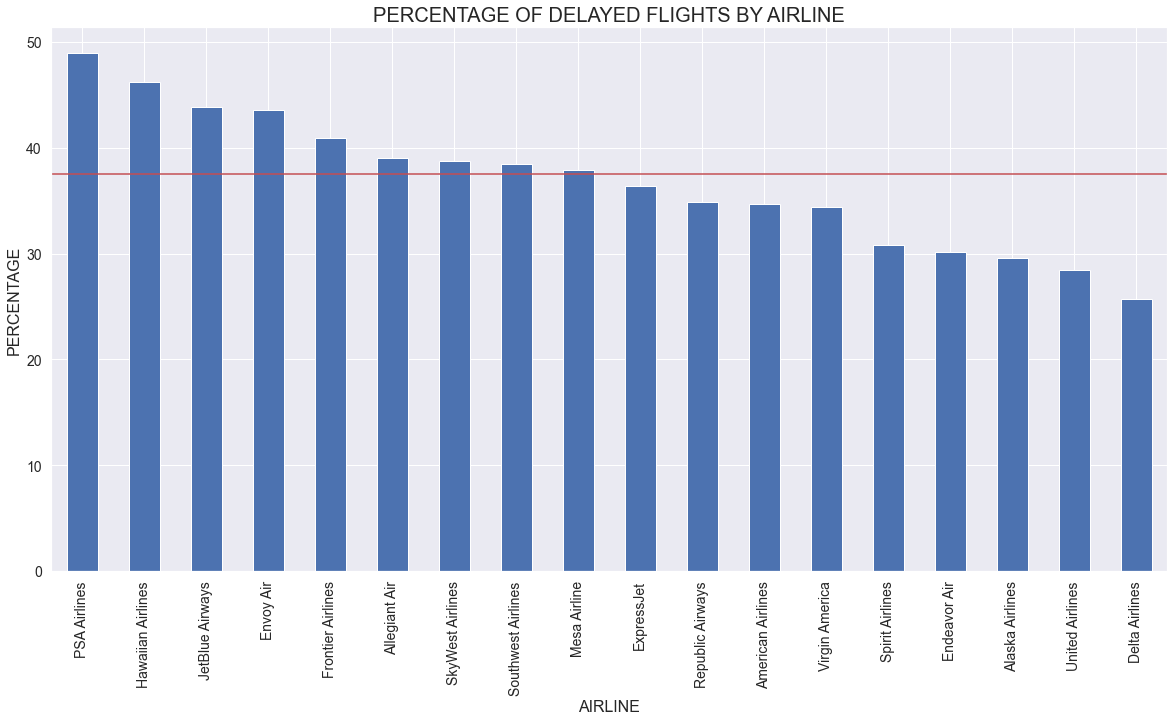

In [128]:
# 10. Plot with the 37.52% threshold value as a horizontal red line
plt.figure(figsize=(20, 10))
df_fp.groupby('OP_CARRIER').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=37.52, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

## Total Minutes Delayed by Airline

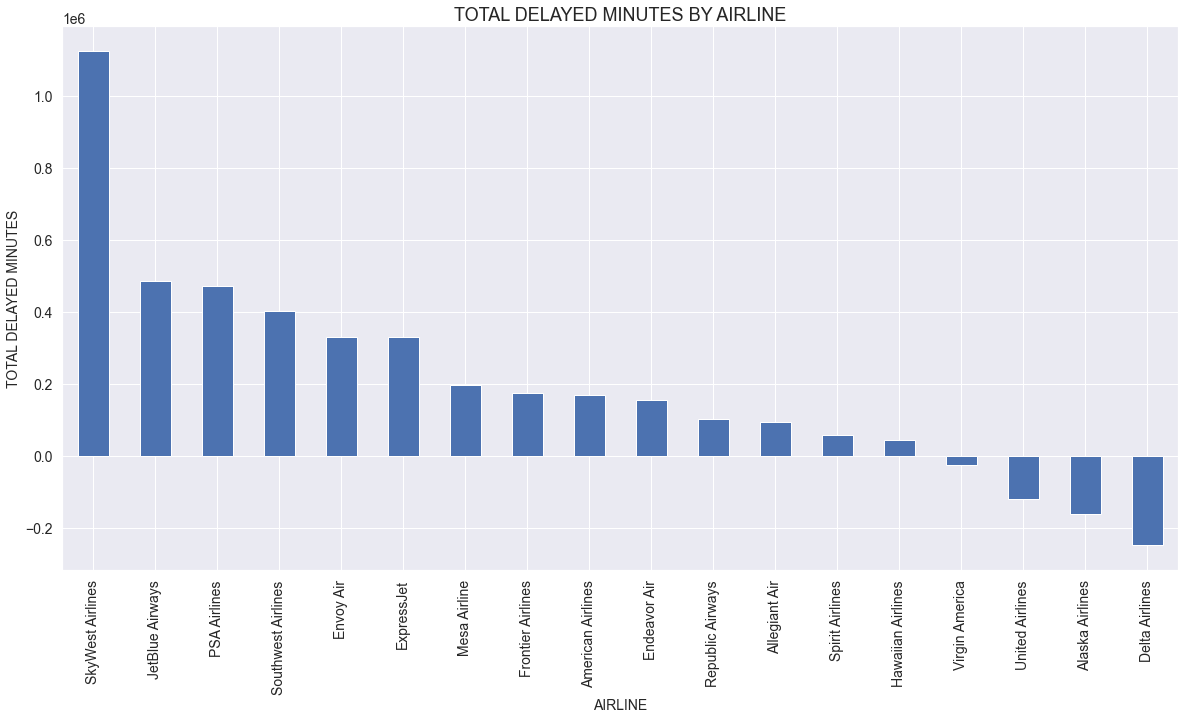

In [129]:
plt.figure(figsize=(20, 10))
df1.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

## Average Delay Time per Airline

In [130]:
df1.head(2)

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,01-01-2018,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605,0
1,01-01-2018,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414,0


In [131]:
test_3 = df1[['OP_CARRIER', 'ARR_DELAY']]
test_3 = test_3.groupby(['OP_CARRIER']).mean().reset_index()
test_3.rename({'ARR_DELAY': 'AVG_DELAY'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['AVG_DELAY']).reset_index(drop=True)
test_3.head(18)

,OP_CARRIER,AVG_DELAY
0,Alaska Airlines,-5.722733
1,Virgin America,-2.271815
2,Delta Airlines,-1.910320
3,United Airlines,-1.473643
4,American Airlines,1.263742
5,Southwest Airlines,2.072112
6,Spirit Airlines,2.243146
7,Republic Airways,2.294882
8,Hawaiian Airlines,3.651029
9,Endeavor Air,4.961961


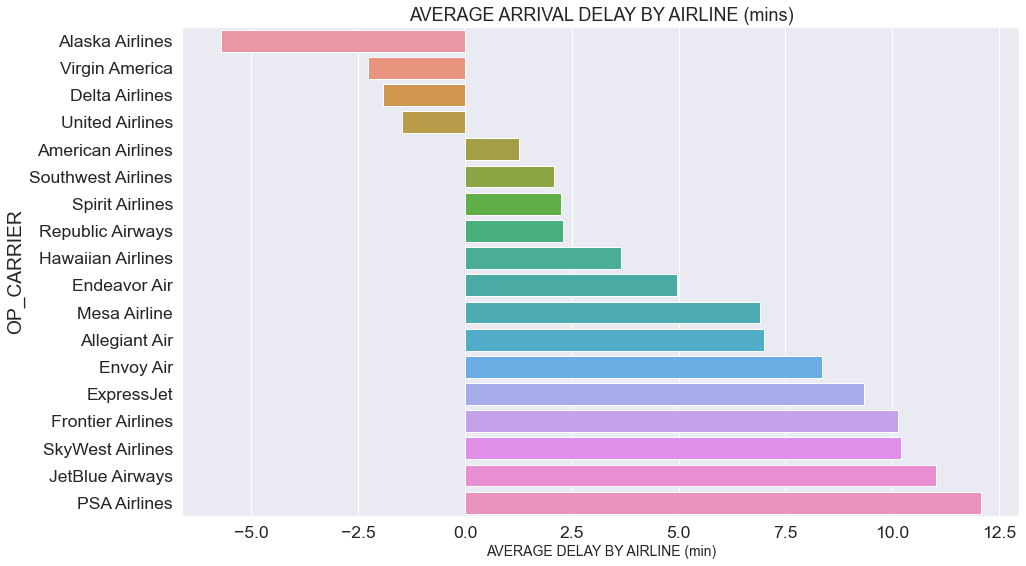

In [132]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AVG_DELAY', y='OP_CARRIER', data=test_3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

## 20 Most Common Destination (Cities)

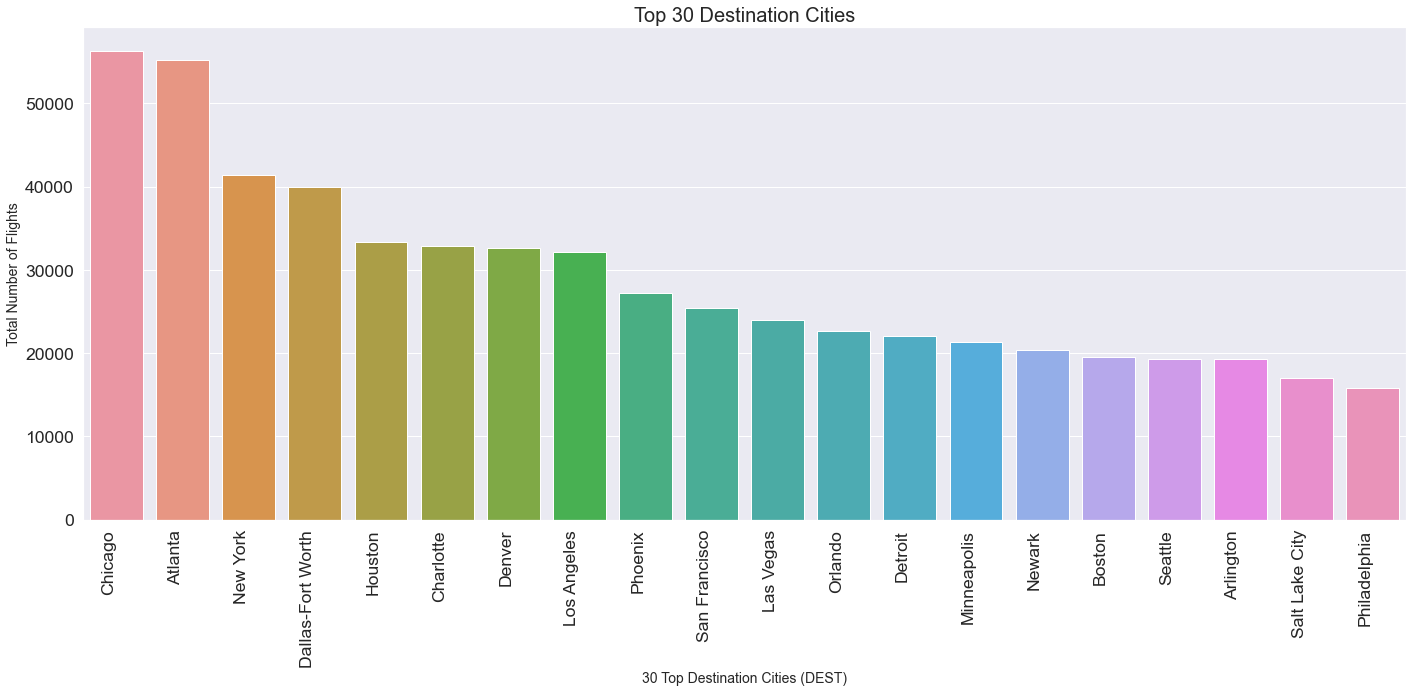

In [133]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['DEST'], data=df1, order=df1['DEST'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 30 Destination Cities', fontsize=20)
plt.xlabel('30 Top Destination Cities (DEST)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

## Best and worst months to travel based on flight delays

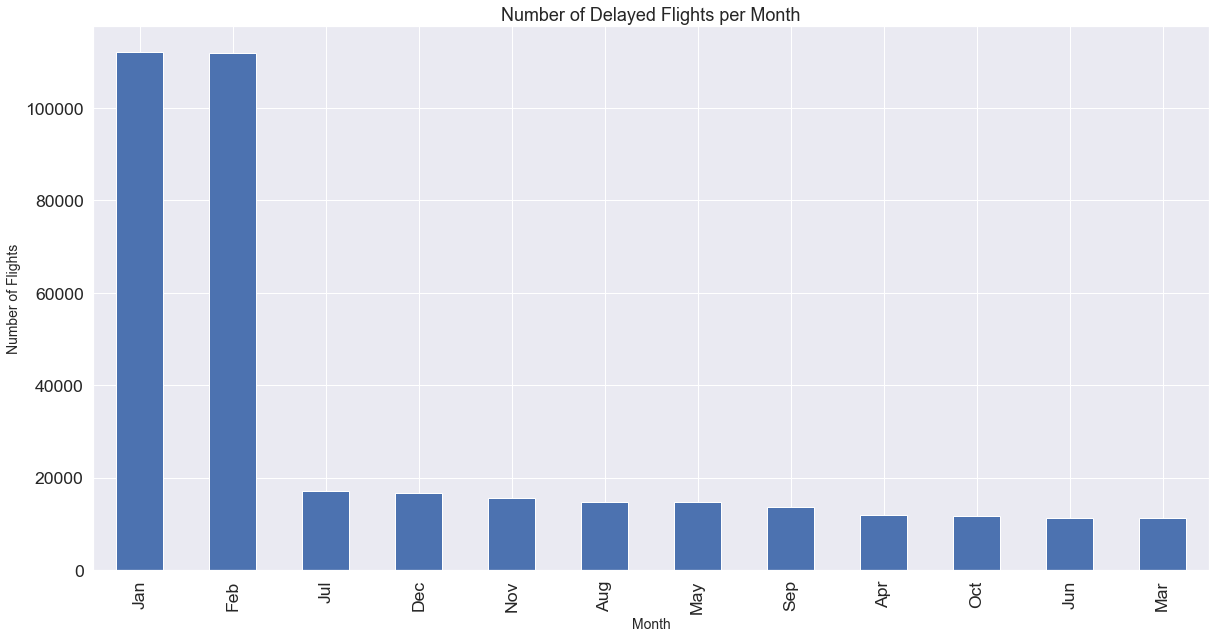

In [134]:
plt.figure(figsize=(20, 10))
df1.groupby('MONTH_AB').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

## Is there any better day to travel?

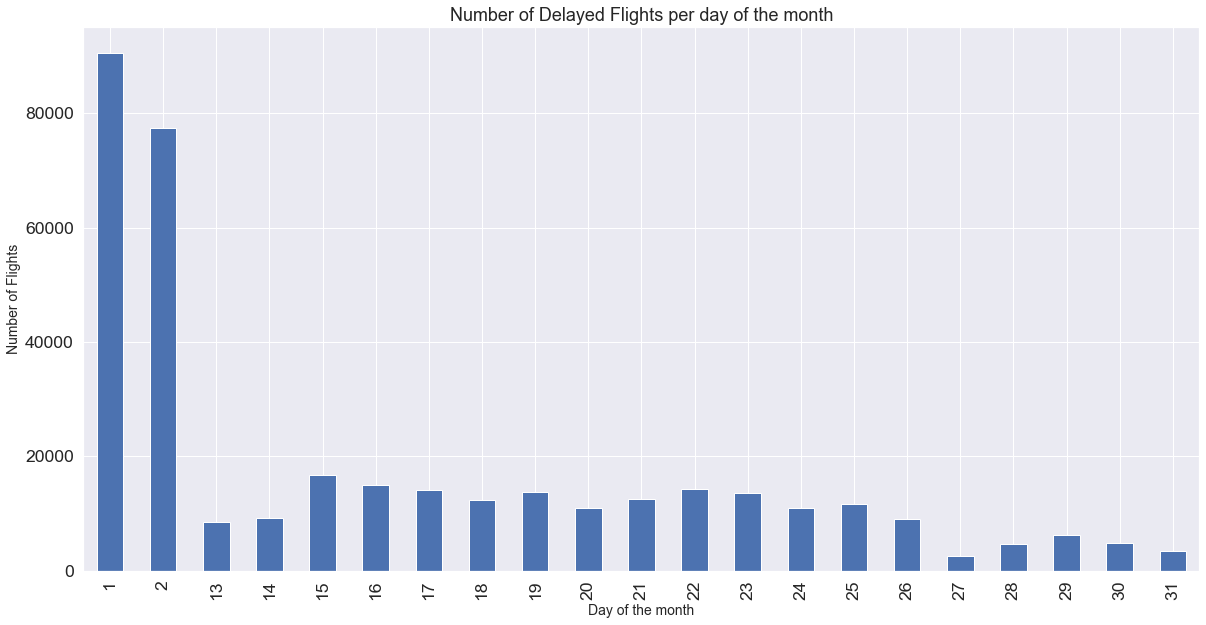

In [135]:
plt.figure(figsize=(20, 10))
df1.groupby('DAY').FLIGHT_STATUS.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

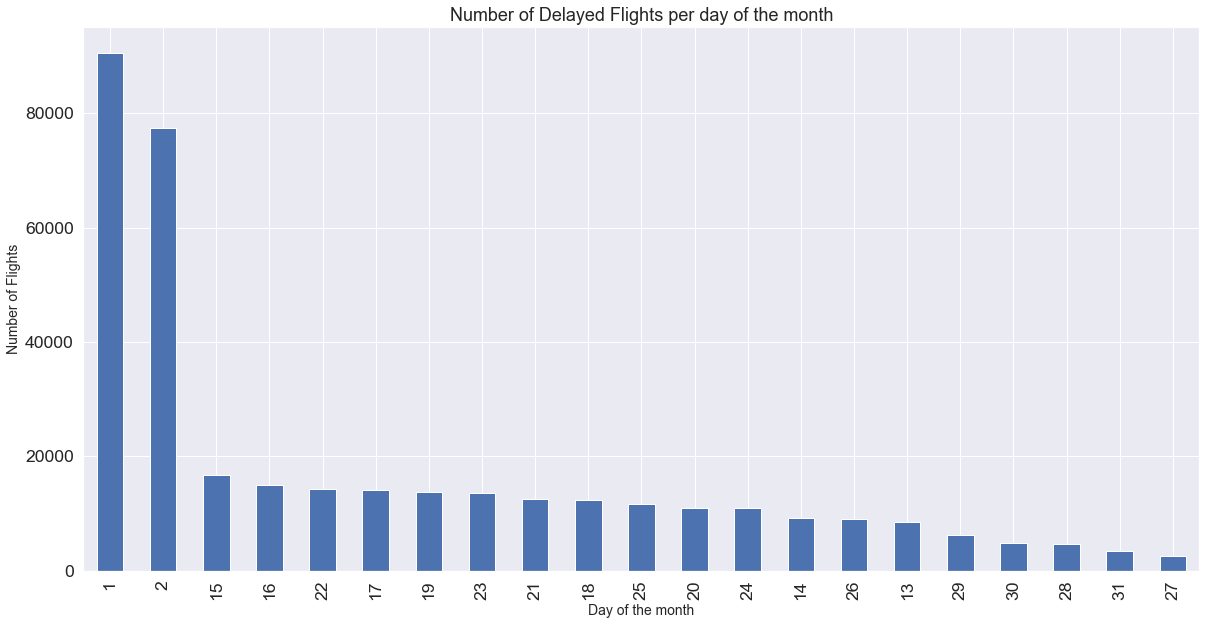

In [136]:
plt.figure(figsize=(20, 10))
barplot =df1.groupby('DAY').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

## Impact of Delays (Departure vs. Arrival Delay)

In [137]:
import matplotlib as mpl
%matplotlib inline


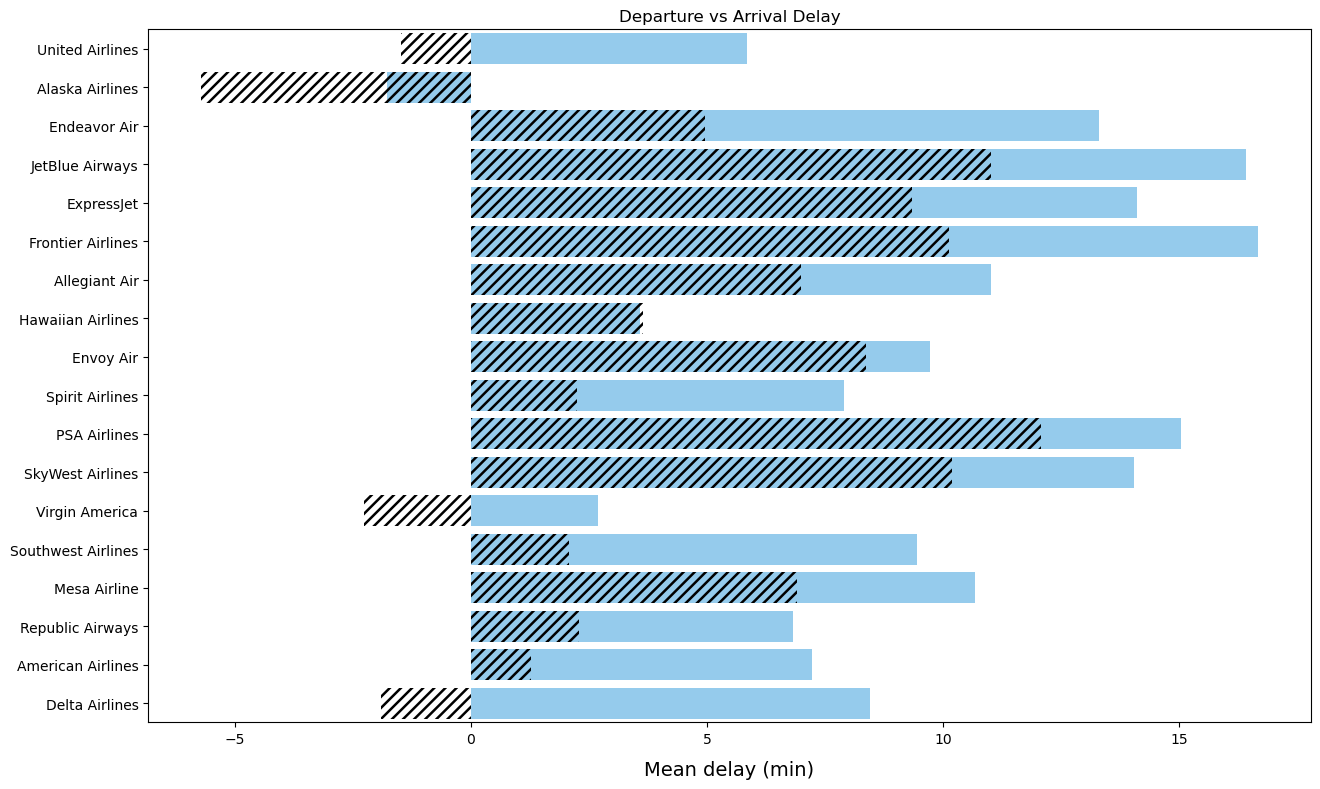

In [138]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DEP_DELAY", y="OP_CARRIER", data=df1, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARR_DELAY", y="OP_CARRIER", data=df1, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10);

In [139]:
df1_LA = df1[(df1['ARR_DELAY'] >= 15)]

In [140]:
df1_LA.shape

(189518, 20)

In [141]:
df1_LD = df1[(df1['DEP_DELAY'] > 15)]
df1_LD.shape

(179618, 20)

In [142]:
df1_LD.DEP_DELAY.describe()

count    179618.000000
mean         67.856095
std          87.196312
min          16.000000
25%          25.000000
50%          41.000000
75%          78.000000
max        2482.000000
Name: DEP_DELAY, dtype: float64

## Most Popular Destination with Average Arrival Delays

In [143]:
df1.head()

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,01-01-2018,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605,0
1,01-01-2018,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414,0
2,01-01-2018,1,1,Jan,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846,0
3,01-01-2018,1,1,Jan,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120,0
4,01-01-2018,1,1,Jan,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,112.0,106.0,83.0,723,1


In [144]:
test_4 = df1[['DEST', 'ARR_DELAY']]
test_4 = test_4.groupby(['DEST']).mean().reset_index()
test_4.head(10)

,DEST,ARR_DELAY
0,Aberdeen,1.000000
1,Abilene,10.169550
2,Adak,-11.000000
3,Agana,0.464286
4,Aguadilla,14.343915
5,Akron,13.405784
6,Albany,4.629722
7,Albuquerque,3.693764
8,Alexandria,2.489451
9,Allentown,10.602094


In [145]:
test_5 = df1.DEST.value_counts().rename_axis('DEST').reset_index(name='FLIGHTS').iloc[0:30]
test_5.head(30)

,DEST,FLIGHTS
0,Chicago,56313
1,Atlanta,55227
2,New York,41430
3,Dallas-Fort Worth,39986
4,Houston,33301
5,Charlotte,32833
6,Denver,32672
7,Los Angeles,32172
8,Phoenix,27170
9,San Francisco,25353


In [146]:
test_4_5 = pd.merge(test_5, test_4, on='DEST')
test_4_5.head()

,DEST,FLIGHTS,ARR_DELAY
0,Chicago,56313,6.281427
1,Atlanta,55227,2.182845
2,New York,41430,6.877263
3,Dallas-Fort Worth,39986,5.090132
4,Houston,33301,2.022432


In [147]:
test_4_5.describe()

,FLIGHTS,ARR_DELAY
count,30.000000,30.000000
mean,23217.066667,2.650543
std,12605.197669,2.916384
min,8965.000000,-1.419700
25%,14423.750000,0.761245
50%,19955.000000,1.969566
75%,30921.500000,3.976062
max,56313.000000,9.611741


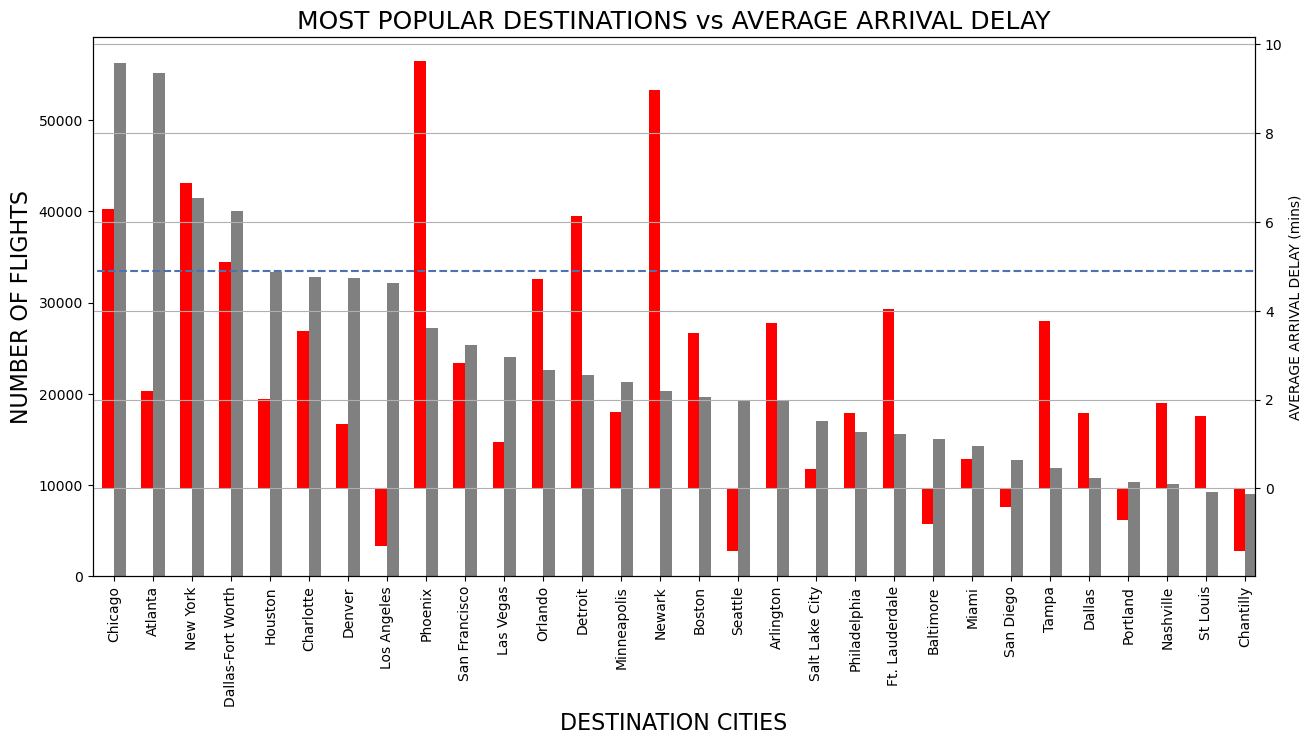

In [148]:
test_4_5 = test_4_5.set_index('DEST')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

test_4_5.FLIGHTS.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
test_4_5.ARR_DELAY.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)

plt.show()

## Departure Cities with the most Delayed Departure Flights

In [149]:
test_6 = df1[['ORIGIN', 'DEP_DELAY']]
test_6 = test_6.groupby(['ORIGIN']).mean().reset_index()
test_6.head(10)

,ORIGIN,DEP_DELAY
0,Aberdeen,22.745455
1,Abilene,13.179310
2,Adak,2.714286
3,Agana,-4.089286
4,Aguadilla,19.379679
5,Akron,16.934037
6,Albany,10.582960
7,Albuquerque,7.429904
8,Alexandria,6.651261
9,Allentown,17.774869


In [150]:
test_7 = df1.ORIGIN.value_counts().rename_axis('ORIGIN').reset_index(name='FLIGHTS').iloc[0:30]
test_7.head(30)

,ORIGIN,FLIGHTS
0,Chicago,56413
1,Atlanta,55196
2,New York,41412
3,Dallas-Fort Worth,40147
4,Houston,33405
5,Charlotte,32927
6,Denver,32663
7,Los Angeles,32176
8,Phoenix,27229
9,San Francisco,25364


In [151]:
test_6_7 = pd.merge(test_7, test_6, on='ORIGIN')
test_6_7.head()

,ORIGIN,FLIGHTS,DEP_DELAY
0,Chicago,56413,13.287416
1,Atlanta,55196,9.696246
2,New York,41412,12.042138
3,Dallas-Fort Worth,40147,10.049095
4,Houston,33405,7.988265


In [152]:
test_6_7.shape

(30, 3)

In [153]:
test_6_7.describe()

,FLIGHTS,DEP_DELAY
count,30.000000,30.000000
mean,23233.300000,9.222975
std,12623.652677,2.496112
min,8965.000000,3.161699
25%,14416.750000,7.921444
50%,19924.500000,9.478714
75%,30939.250000,10.699693
max,56413.000000,14.975271


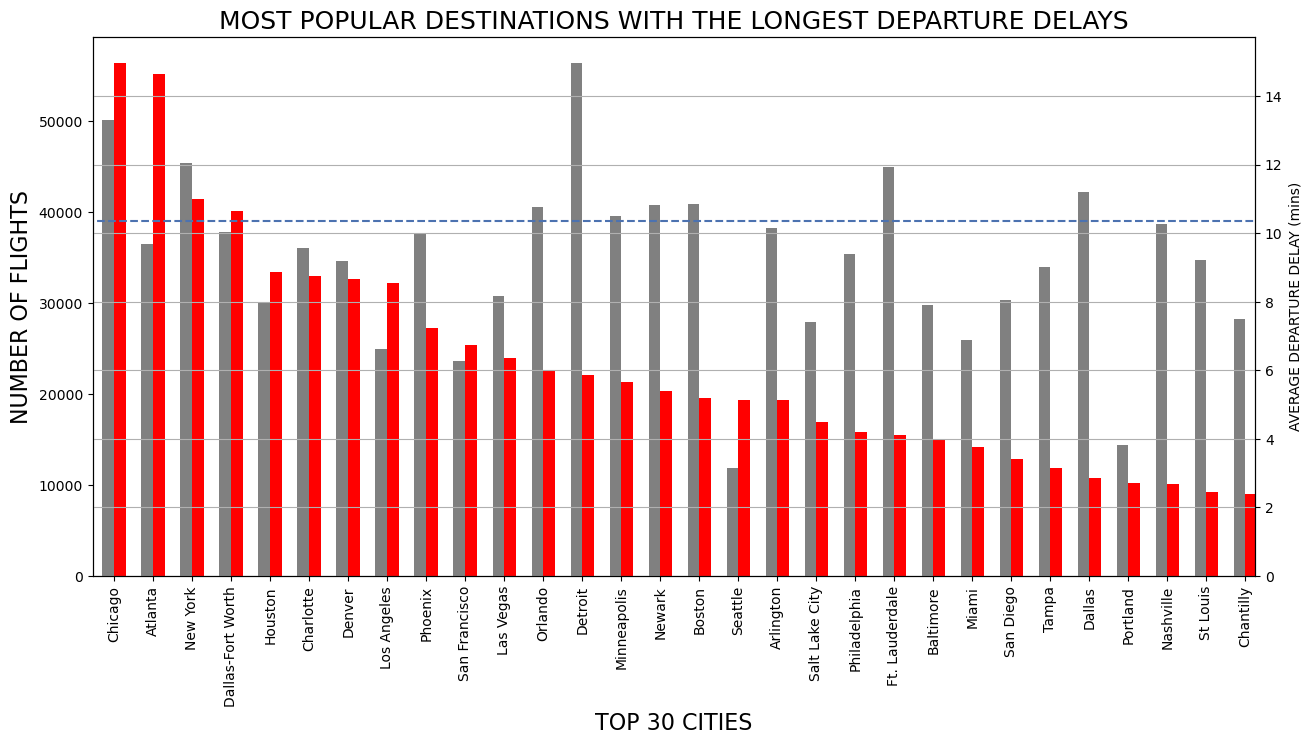

In [154]:
test_6_7 = test_6_7.set_index('ORIGIN')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

test_6_7.FLIGHTS.plot(kind='bar',color='red',ax=ax, width=width, position=0)
test_6_7.DEP_DELAY.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.show()

## Number of Destinations by Airline

In [155]:
cities = df1[['OP_CARRIER', 'DEST', 'ARR_DELAY']]
cities = cities.groupby(['OP_CARRIER', 'DEST']).mean().reset_index()

In [156]:
cities.OP_CARRIER.value_counts()

SkyWest Airlines      218
Delta Airlines        140
ExpressJet            124
Envoy Air             123
Allegiant Air         118
Endeavor Air          114
Mesa Airline          105
United Airlines        98
American Airlines      97
PSA Airlines           92
Southwest Airlines     85
Republic Airways       83
Alaska Airlines        68
JetBlue Airways        62
Frontier Airlines      60
Spirit Airlines        39
Virgin America         27
Hawaiian Airlines      17
Name: OP_CARRIER, dtype: int64

In [157]:
temp = cities[(cities['OP_CARRIER'] == "Delta Airlines")]

In [158]:
temp.head()

,OP_CARRIER,DEST,ARR_DELAY
283,Delta Airlines,Akron,-3.116129
284,Delta Airlines,Albany,-5.684211
285,Delta Airlines,Albuquerque,-8.588235
286,Delta Airlines,Allentown,-7.806452
287,Delta Airlines,Anchorage,-5.021739


In [159]:
# I need to double check that this is really grabbing all the destinations per airline
# If it is I should be getting a 140.
temp.DEST.nunique()

140

In [160]:
cities_airline = cities.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='NUMBER_CITIES')
cities_airline.head(18)

,OP_CARRIER,NUMBER_CITIES
0,SkyWest Airlines,218
1,Delta Airlines,140
2,ExpressJet,124
3,Envoy Air,123
4,Allegiant Air,118
5,Endeavor Air,114
6,Mesa Airline,105
7,United Airlines,98
8,American Airlines,97
9,PSA Airlines,92


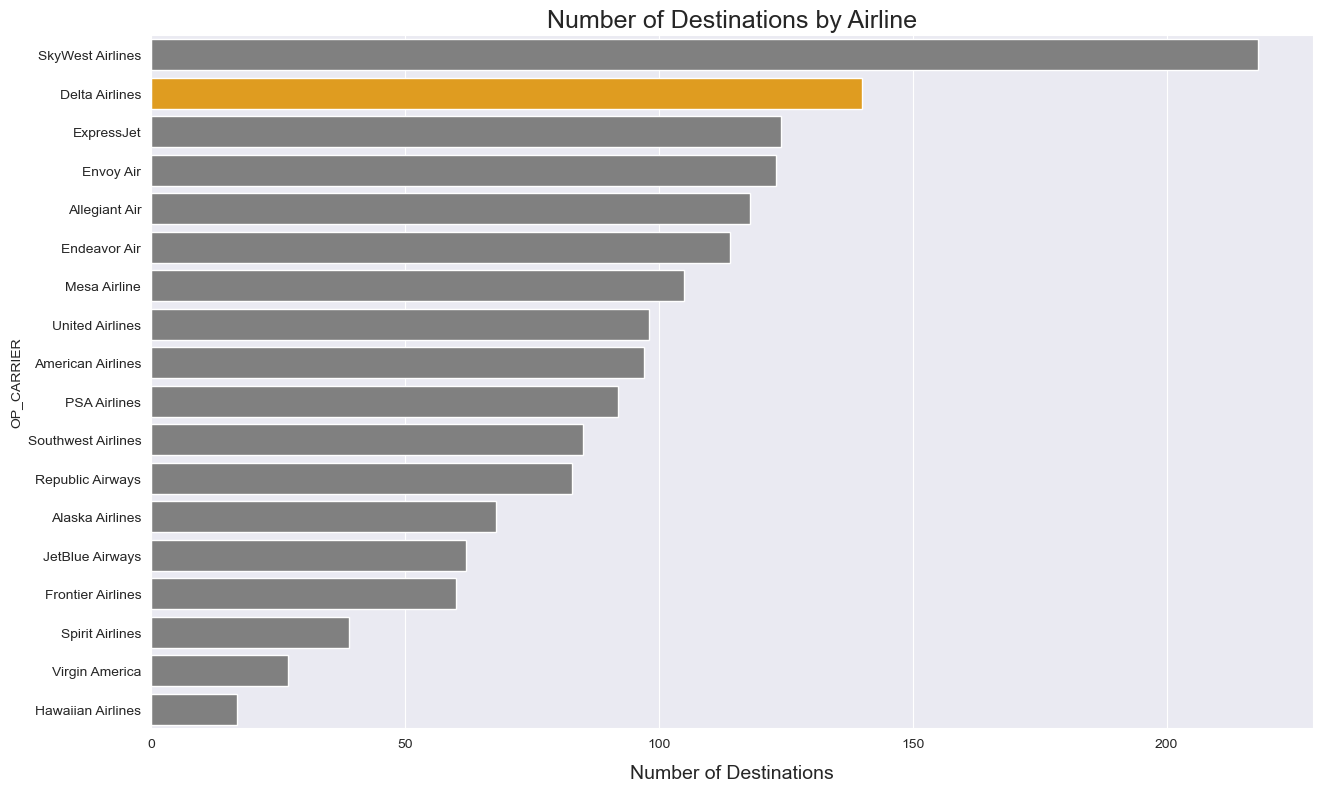

In [161]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="NUMBER_CITIES", y="OP_CARRIER", data=cities_airline, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Number of Destinations by Airline', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()

In [162]:
df1.columns

Index(['FL_DATE', 'DAY', 'MONTH', 'MONTH_AB', 'OP_CARRIER', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FLIGHT_STATUS'],
      dtype='object')

In [163]:
df1['ARR-DEP_DELAY'] = df1['ARR_DELAY'] - df1['DEP_DELAY']
df1.head(3).append(df1.tail(3))

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,ARR-DEP_DELAY
0,01-01-2018,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605,0,-18.0
1,01-01-2018,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414,0,-16.0
2,01-01-2018,1,1,Jan,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846,0,-8.0
1048572,26-02-2018,26,2,Feb,Delta Airlines,Atlanta,Philadelphia,4,8.0,20.0,4,4,4.0,4,-3.0,123.0,112.0,88.0,666,0,-11.0
1048573,26-02-2018,26,2,Feb,Delta Airlines,West Palm Beach,New York,2,-6.0,12.0,2,2,13.0,2,-31.0,178.0,153.0,128.0,1035,0,-25.0
1048574,26-02-2018,26,2,Feb,Delta Airlines,Atlanta,Ft. Myers,3,-3.0,13.0,3,3,3.0,3,-10.0,101.0,94.0,78.0,515,0,-7.0


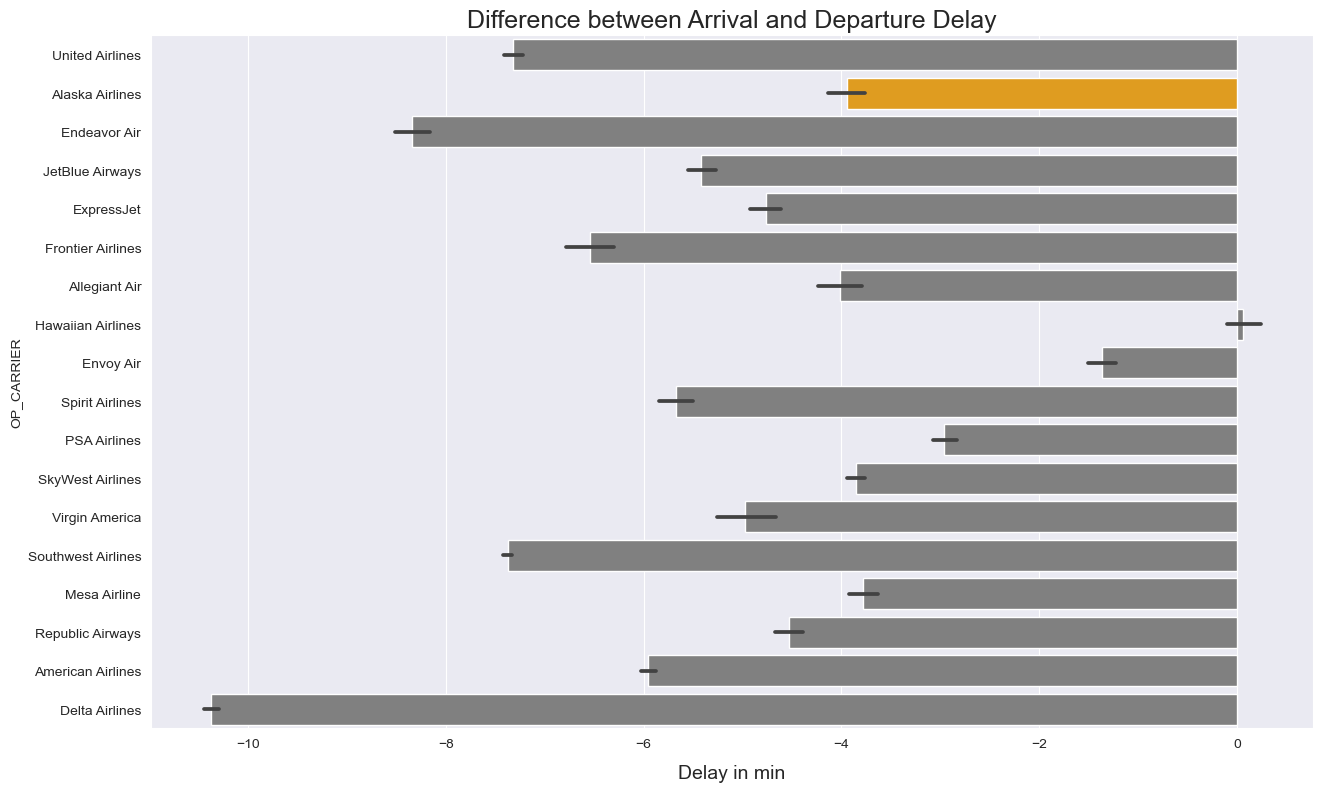

In [164]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="ARR-DEP_DELAY", y="OP_CARRIER", data=df1, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Difference between Arrival and Departure Delay', fontsize=18)
plt.xlabel('Delay in min', fontsize=14, labelpad=10);
plt.show()

### Visualizations - Sub-Plots

In [165]:
df2 = pd.merge(df_fp, test_3, on='OP_CARRIER')
df2 = pd.merge(df2, cities_airline, on='OP_CARRIER')
df2.head(3)

,OP_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED,AVG_DELAY,NUMBER_CITIES
0,Alaska Airlines,8310,28056,29.62,-5.722733,68
1,Allegiant Air,5215,13346,39.08,7.002473,118
2,American Airlines,46591,134245,34.71,1.263742,97


In [166]:
test_8 = df1[['OP_CARRIER', 'ARR_DELAY']]
test_8.head(2)

,OP_CARRIER,ARR_DELAY
0,United Airlines,-23.0
1,United Airlines,-24.0


In [167]:
test_8.shape

(1019683, 2)

In [168]:
test_8 = test_8.groupby('OP_CARRIER').sum().sort_values(by=['ARR_DELAY']).reset_index()
test_8.rename({'ARR_DELAY': 'TOTAL_DELAY_MIN'}, axis=1, inplace=True)

In [169]:
df2 = pd.merge(df2, test_8, on='OP_CARRIER')
df2 = df2.sort_values(by=['TOTAL_FLIGHTS'], ascending=False)
df2.head(18)

,OP_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED,AVG_DELAY,NUMBER_CITIES,TOTAL_DELAY_MIN
14,Southwest Airlines,74809,194587,38.45,2.072112,85,403206.0
2,American Airlines,46591,134245,34.71,1.263742,97,169651.0
3,Delta Airlines,33442,130151,25.69,-1.910320,140,-248630.0
13,SkyWest Airlines,42771,110347,38.76,10.193934,218,1124870.0
16,United Airlines,23094,81059,28.49,-1.473643,98,-119452.0
12,Republic Airways,15597,44767,34.84,2.294882,83,102735.0
9,JetBlue Airways,19349,44074,43.90,11.013886,62,485426.0
5,Envoy Air,17157,39388,43.56,8.360770,123,329314.0
11,PSA Airlines,19080,38990,48.94,12.087510,92,471292.0
6,ExpressJet,12818,35241,36.37,9.342414,124,329236.0


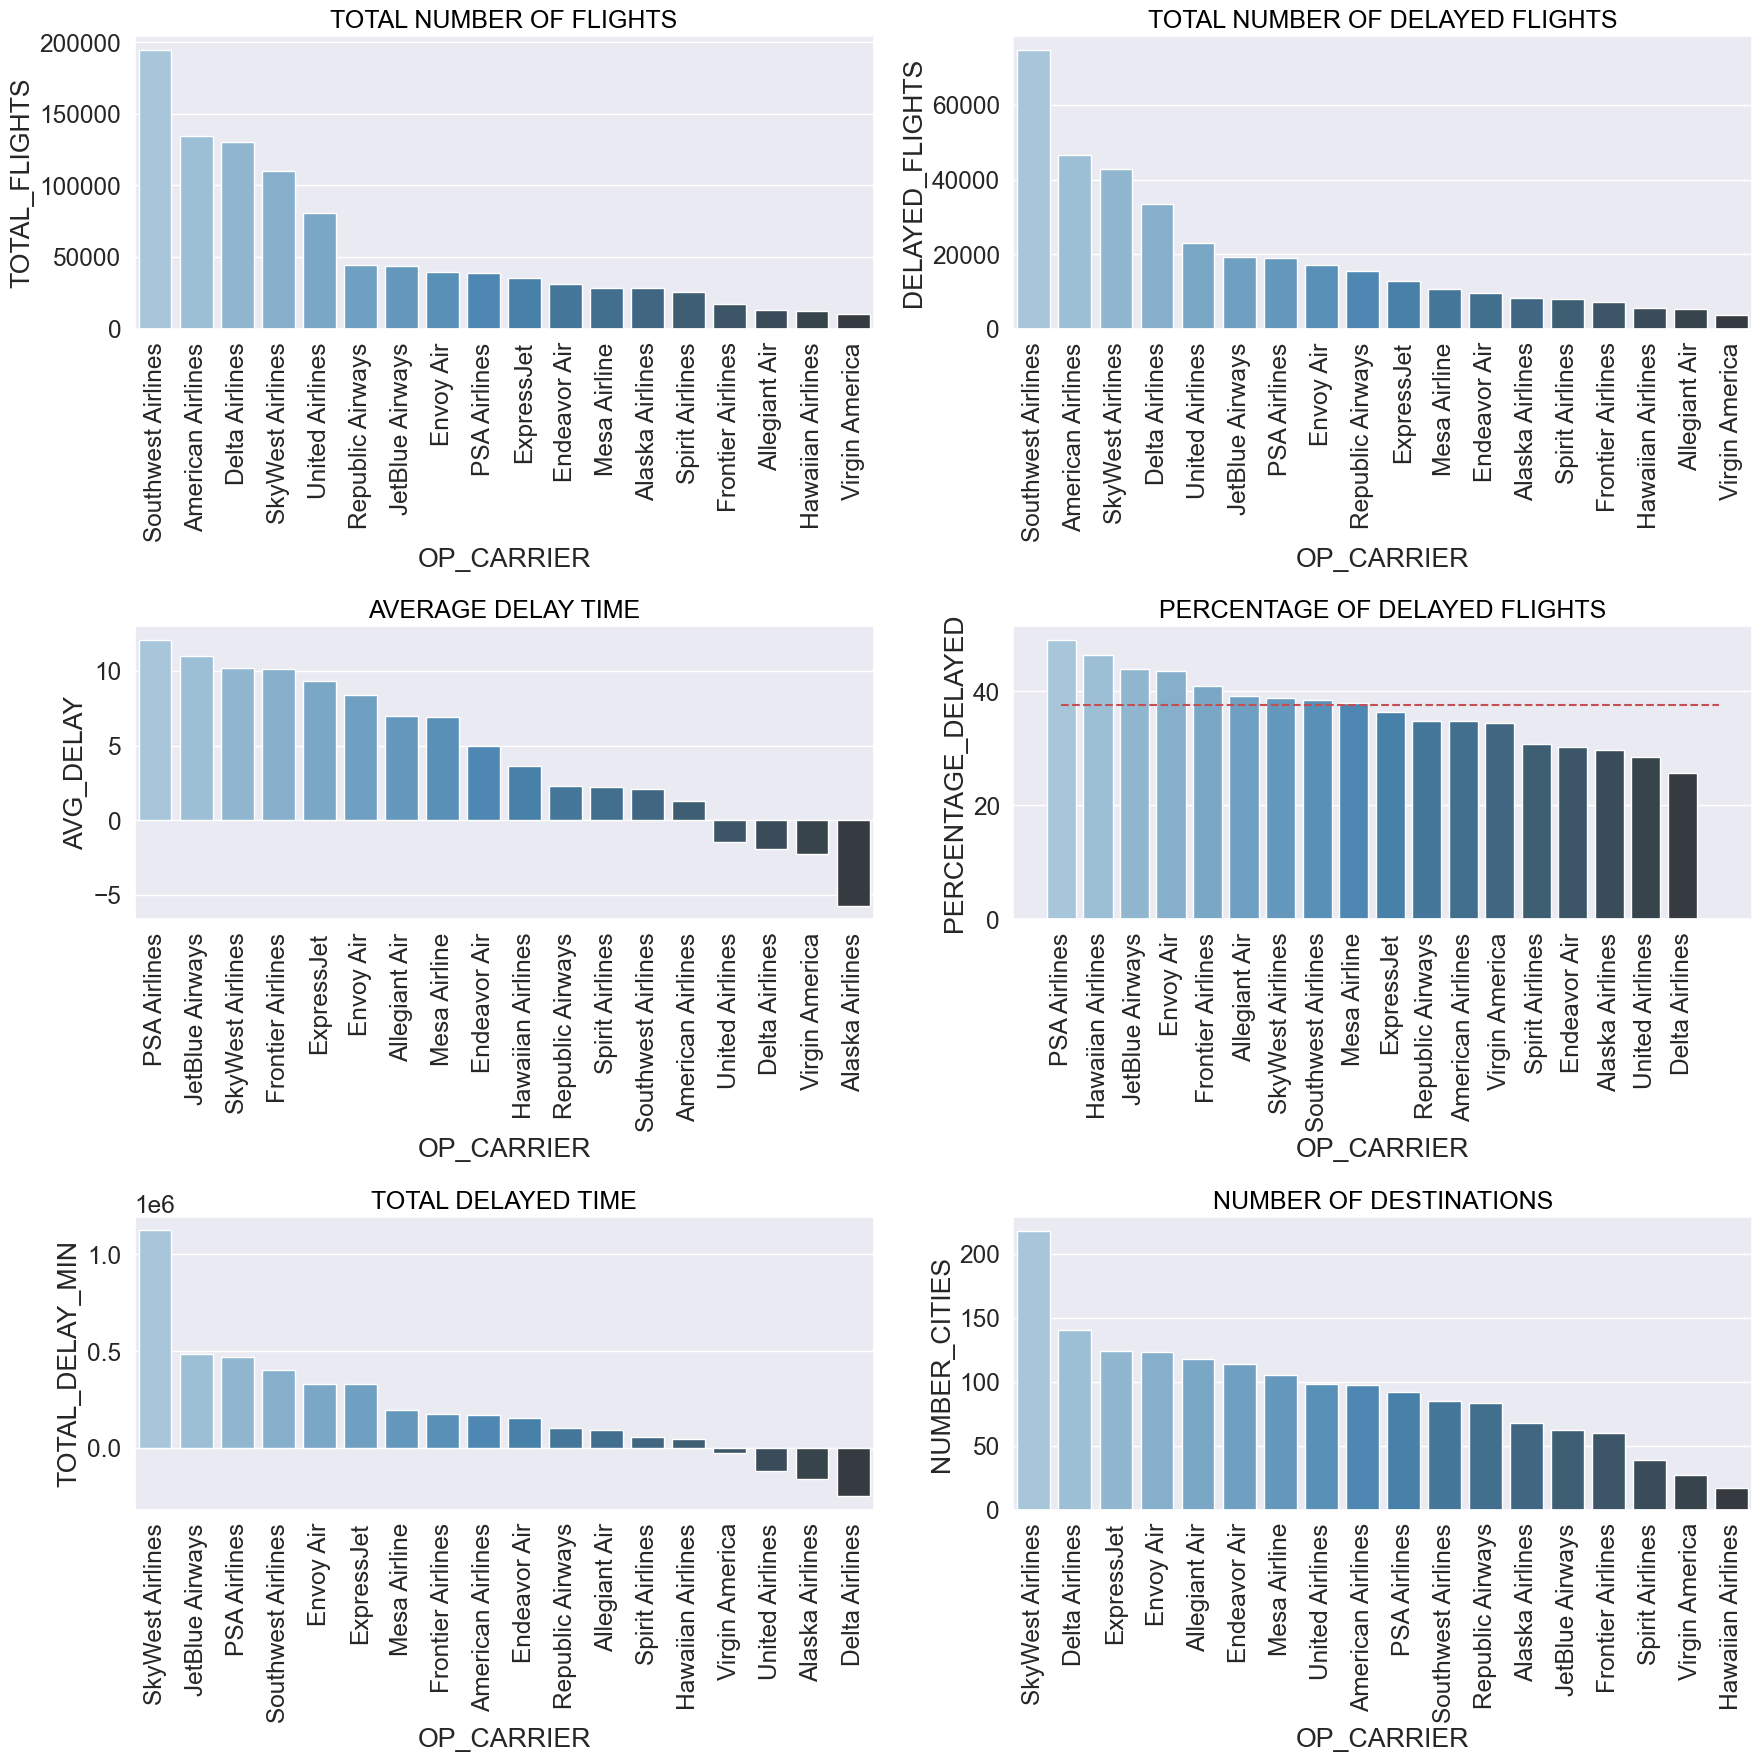

In [170]:
#highlight = "Delta Airlines"
#pos = df1.OP_CARRIER.get_loc(highlight)

fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(321) # instead of plt.subplot(3, 2, 1)
sub1.set_title('TOTAL NUMBER OF FLIGHTS', fontsize=18, color="black")
sub1 = sns.barplot(x="OP_CARRIER", y="TOTAL_FLIGHTS", data=df2, palette="Blues_d", ax=sub1)
#sub1 = sns.barplot(x="OP_CARRIER", y="TOTAL_FLIGHTS", data=df2, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub1)
sub1.set_xticklabels(sub1.get_xticklabels(), rotation=90)

sub2 = fig.add_subplot(322)
sub2.set_title('TOTAL NUMBER OF DELAYED FLIGHTS', fontsize=18, color="black")
sub2 = sns.barplot(x="OP_CARRIER", y="DELAYED_FLIGHTS", data=df2, order=df2.sort_values('DELAYED_FLIGHTS', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub2)
#sub2 = sns.barplot(x="OP_CARRIER", y="DELAYED_FLIGHTS", data=df2, order=df2.sort_values('DELAYED_FLIGHTS', ascending=False).OP_CARRIER, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub2)
sub2.set_xticklabels(sub2.get_xticklabels(), rotation=90)

sub3 = fig.add_subplot(323)
sub3.set_title('AVERAGE DELAY TIME', fontsize=18, color="black")
sub3 = sns.barplot(x="OP_CARRIER", y="AVG_DELAY", data=df2, order=df2.sort_values('AVG_DELAY', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub3)
#sub3 = sns.barplot(x="OP_CARRIER", y="AVG_DELAY", data=df2, order=df2.sort_values('AVG_DELAY', ascending=False).OP_CARRIER, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub3)
sub3.set_xticklabels(sub3.get_xticklabels(), rotation=90)

sub4 = fig.add_subplot(324)
sub4.set_title('PERCENTAGE OF DELAYED FLIGHTS', fontsize=18, color="black")
sub4 = sns.barplot(x="OP_CARRIER", y="PERCENTAGE_DELAYED", data=df2, order=df2.sort_values('PERCENTAGE_DELAYED', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub4)
sub4.set_xticklabels(sub4.get_xticklabels(), rotation=90)
plt.hlines(y=37.52, xmin=0, xmax=18, colors='r', linestyles='dashed', label='cutoff')

sub5 = fig.add_subplot(325)
sub5.set_title('TOTAL DELAYED TIME', fontsize=18, color="black")
sub5 = sns.barplot(x="OP_CARRIER", y="TOTAL_DELAY_MIN", data=df2, order=df2.sort_values('TOTAL_DELAY_MIN', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub5)
sub5.set_xticklabels(sub5.get_xticklabels(), rotation=90)

sub6 = fig.add_subplot(326)
sub6.set_title('NUMBER OF DESTINATIONS', fontsize=18, color="black")
sub6 = sns.barplot(x="OP_CARRIER", y="NUMBER_CITIES", data=df2, order=df2.sort_values('NUMBER_CITIES', ascending=False).OP_CARRIER, palette="Blues_d", ax=sub6)
sub6.set_xticklabels(sub6.get_xticklabels(), rotation=90)

fig.tight_layout()

plt.show()

pip install xgboost## MLP Neural Networks

In [171]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [172]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D , SeparableConv2D, MaxPool2D, Flatten , Dropout , BatchNormalization
from keras import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn import metrics, linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from scipy.optimize import curve_fit
from sklearn.svm import SVC
from random import sample

from sklearn.datasets import load_breast_cancer

import tensorflow as tf
from tensorflow import keras

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

In [173]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577764 entries, 0 to 1048573
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OP_CARRIER           577764 non-null  object 
 1   ORIGIN               577764 non-null  object 
 2   DEST                 577764 non-null  object 
 3   CRS_DEP_TIME         577764 non-null  int64  
 4   DEP_DELAY            577764 non-null  float64
 5   TAXI_OUT             577764 non-null  float64
 6   WHEELS_OFF           577764 non-null  int64  
 7   WHEELS_ON            577764 non-null  int64  
 8   TAXI_IN              577764 non-null  float64
 9   CRS_ARR_TIME         577764 non-null  int64  
 10  ARR_DELAY            577764 non-null  float64
 11  CRS_ELAPSED_TIME     577764 non-null  float64
 12  ACTUAL_ELAPSED_TIME  577764 non-null  float64
 13  AIR_TIME             577764 non-null  float64
 14  DISTANCE             577764 non-null  int64  
 15  DAY             

In [174]:
OP_CARRIER_dummies = pd.get_dummies(dfm['OP_CARRIER'], prefix='OP_CARRIER', drop_first=True)
DEST_dummies = pd.get_dummies(dfm['DEST'], prefix='DEST', drop_first=True)
CRS_DEP_TIME_dummies = pd.get_dummies(dfm['CRS_DEP_TIME'], prefix='CRS_DEP_TIME', drop_first=True)
CRS_ARR_TIME_dummines = pd.get_dummies(dfm['CRS_ARR_TIME'], prefix='CRS_ARR_TIME', drop_first=True) 
MONTH_dummies = pd.get_dummies(dfm['MONTH'], prefix='MONTH', drop_first=True)
WEEKDAY_dummies = pd.get_dummies(dfm['WEEKDAY'], prefix='WEEKDAY', drop_first=True)

In [175]:
dfm = dfm.drop(['OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'MONTH', 'WEEKDAY', 'ACTUAL_ELAPSED_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'ARR_DELAY', 'TAXI_IN', 'TAXI_OUT'], axis=1)

In [176]:
dfm = pd.concat([dfm, OP_CARRIER_dummies, DEST_dummies, CRS_DEP_TIME_dummies, CRS_ARR_TIME_dummines, MONTH_dummies, WEEKDAY_dummies], axis=1)

In [177]:
dfm.head(2)

,DEP_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,FLIGHT_STATUS,OP_CARRIER_Allegiant Air,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_Hawaiian Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,DEST_Atlanta,DEST_Boston,DEST_Charlotte,DEST_Chicago,DEST_Dallas-Fort Worth,DEST_Denver,DEST_Detroit,DEST_Houston,DEST_Las Vegas,DEST_Los Angeles,DEST_Minneapolis,DEST_New York,DEST_Newark,DEST_Orlando,DEST_Philadelphia,DEST_Phoenix,DEST_Salt Lake City,DEST_San Francisco,DEST_Seattle,CRS_DEP_TIME_2,CRS_DEP_TIME_3,CRS_DEP_TIME_4,CRS_ARR_TIME_2,CRS_ARR_TIME_3,CRS_ARR_TIME_4,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
0,-5.0,268.0,225.0,1605,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-8.0,99.0,65.0,414,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:
dfm.shape

(577764, 65)

In [179]:
dfm.to_csv('dfm_ready.csv')

### Random Forest

In [180]:
# Create features (X) and labels (y)
y = dfm['FLIGHT_STATUS']
X = dfm.drop(['FLIGHT_STATUS', 'DEP_DELAY'], axis=1)

In [181]:
# split the data
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)


In [182]:
# regular Tree
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [183]:
tree_clf.feature_importances_

array([0.00862345, 0.02576556, 0.        , 0.24428145, 0.        ,
       0.        , 0.1766454 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02016795,
       0.        , 0.        , 0.01917967, 0.        , 0.02955944,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00581781, 0.        , 0.00149267, 0.        , 0.        ,
       0.        , 0.00368657, 0.        , 0.        , 0.        ,
       0.        , 0.12972855, 0.        , 0.        , 0.        ,
       0.        , 0.06532529, 0.        , 0.        , 0.        ,
       0.13793675, 0.04859069, 0.00565998, 0.        , 0.        ,
       0.        , 0.01854002, 0.        , 0.        , 0.        ,
       0.        , 0.01939496, 0.        , 0.        , 0.        ,
       0.        , 0.02783681, 0.01176698])

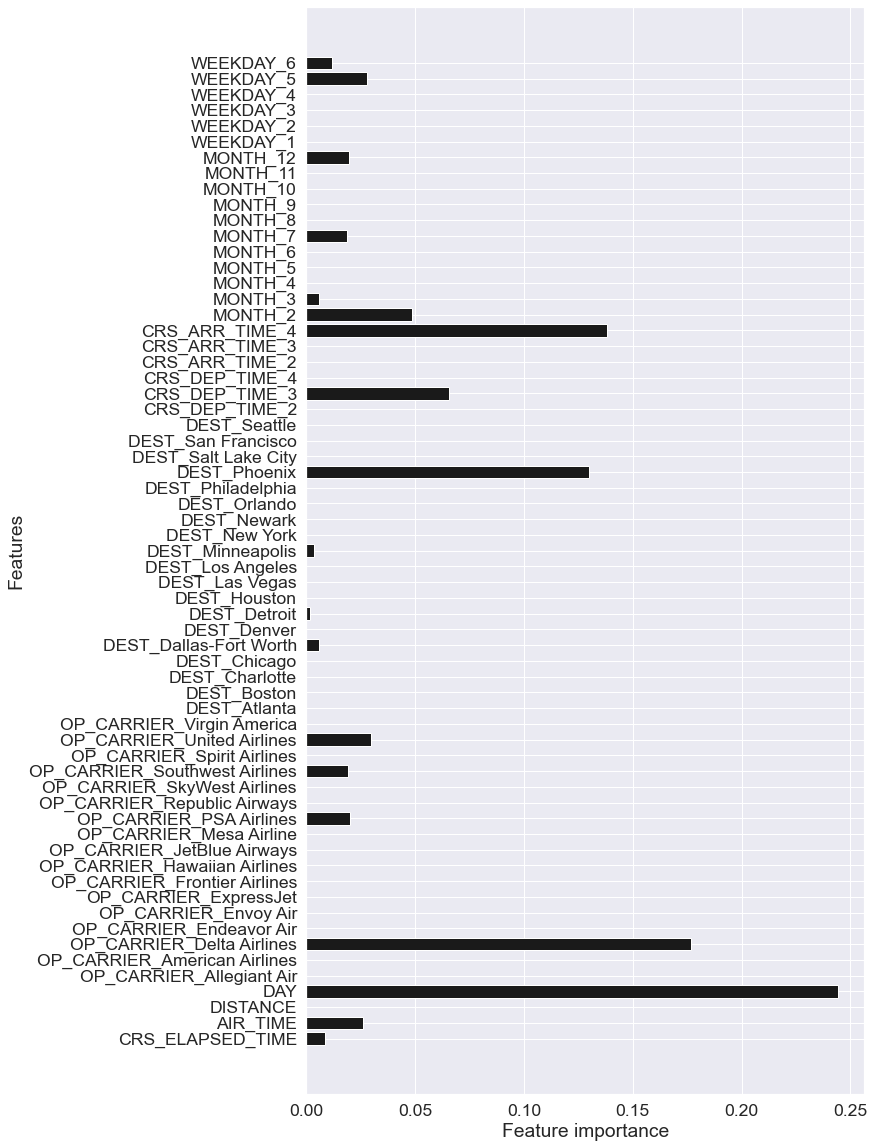

In [184]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10, 20))
    plt.barh(range(n_features), model.feature_importances_, color='k', align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.grid(True)
plot_feature_importances(tree_clf)

In [185]:
# Test set predictions
pred = tree_clf.predict(X_test)

In [186]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,276823,3450,280273
1,147181,5869,153050
All,424004,9319,433323


In [187]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.65      0.99      0.79    280273
           1       0.63      0.04      0.07    153050

    accuracy                           0.65    433323
   macro avg       0.64      0.51      0.43    433323
weighted avg       0.64      0.65      0.53    433323



In [188]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 65.24%


### BAGGED TREES

In [189]:
# instantiate the BaggingClassifire
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [190]:
# Now to fitting the training data:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [191]:
# call the .score() to obtain the accuracy score on the training dataset and then on the test data:
bagged_tree.score(X_train, y_train)

0.6540802126819947

In [192]:
bagged_tree.score(X_test, y_test)

0.6531778834726059

### MODEL PERFORMANCE

In [193]:
# Test set predictions
pred_bt = bagged_tree.predict(X_test)

In [194]:
# confusion matrix and classfication report
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, pred_bt, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,277273,3000,280273
1,147286,5764,153050
All,424559,8764,433323


In [195]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, pred_bt))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.65      0.99      0.79    280273
           1       0.66      0.04      0.07    153050

    accuracy                           0.65    433323
   macro avg       0.66      0.51      0.43    433323
weighted avg       0.65      0.65      0.53    433323



In [196]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred_bt) * 100))

Testing Accuracy for Decision Tree Classifier: 65.32%


### MLP Neural Networks - Part I

In [197]:
dfm_ready = pd.read_csv('dfm_ready.csv', index_col=0)
dfm_ready.head().append(dfm_ready.tail())

,DEP_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,FLIGHT_STATUS,OP_CARRIER_Allegiant Air,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_Hawaiian Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,DEST_Atlanta,DEST_Boston,DEST_Charlotte,DEST_Chicago,DEST_Dallas-Fort Worth,DEST_Denver,DEST_Detroit,DEST_Houston,DEST_Las Vegas,DEST_Los Angeles,DEST_Minneapolis,DEST_New York,DEST_Newark,DEST_Orlando,DEST_Philadelphia,DEST_Phoenix,DEST_Salt Lake City,DEST_San Francisco,DEST_Seattle,CRS_DEP_TIME_2,CRS_DEP_TIME_3,CRS_DEP_TIME_4,CRS_ARR_TIME_2,CRS_ARR_TIME_3,CRS_ARR_TIME_4,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
0,-5.0,268.0,225.0,1605,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-8.0,99.0,65.0,414,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-5.0,134.0,106.0,846,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.0,190.0,157.0,1120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-3.0,206.0,173.0,1222,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1048568,-2.0,211.0,174.0,1124,26,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1048569,-5.0,175.0,141.0,1121,26,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1048571,-8.0,120.0,79.0,581,26,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1048572,8.0,123.0,88.0,666,26,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1048573,-6.0,178.0,128.0,1035,26,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [198]:
df = dfm_ready.astype(float)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577764 entries, 0 to 1048573
Data columns (total 65 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DEP_DELAY                      577764 non-null  float64
 1   CRS_ELAPSED_TIME               577764 non-null  float64
 2   AIR_TIME                       577764 non-null  float64
 3   DISTANCE                       577764 non-null  float64
 4   DAY                            577764 non-null  float64
 5   FLIGHT_STATUS                  577764 non-null  float64
 6   OP_CARRIER_Allegiant Air       577764 non-null  float64
 7   OP_CARRIER_American Airlines   577764 non-null  float64
 8   OP_CARRIER_Delta Airlines      577764 non-null  float64
 9   OP_CARRIER_Endeavor Air        577764 non-null  float64
 10  OP_CARRIER_Envoy Air           577764 non-null  float64
 11  OP_CARRIER_ExpressJet          577764 non-null  float64
 12  OP_CARRIER_Frontier Airlines 

In [200]:
df = df.drop('DAY', axis=1)

In [201]:
# NN
y = df['FLIGHT_STATUS']
X = df.drop(['FLIGHT_STATUS', 'DEP_DELAY'], axis=1)

In [202]:
df.isna().sum().sum()

0

In [203]:
col_names = list(df.columns)

s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

df_s = pd.DataFrame(df_s, columns=col_names)

In [204]:
df_s.head(2)

,DEP_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,OP_CARRIER_Allegiant Air,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_Hawaiian Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,DEST_Atlanta,DEST_Boston,DEST_Charlotte,DEST_Chicago,DEST_Dallas-Fort Worth,DEST_Denver,DEST_Detroit,DEST_Houston,DEST_Las Vegas,DEST_Los Angeles,DEST_Minneapolis,DEST_New York,DEST_Newark,DEST_Orlando,DEST_Philadelphia,DEST_Phoenix,DEST_Salt Lake City,DEST_San Francisco,DEST_Seattle,CRS_DEP_TIME_2,CRS_DEP_TIME_3,CRS_DEP_TIME_4,CRS_ARR_TIME_2,CRS_ARR_TIME_3,CRS_ARR_TIME_4,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
0,-0.307446,1.499400,1.409909,1.204651,-0.738813,-0.083253,-0.443852,-0.429389,-0.174462,-0.184406,-0.180169,-0.13,-0.036885,-0.213093,-0.155724,-0.190369,-0.219858,-0.336824,-0.409005,-0.164264,2.962047,-0.121316,-0.3251,-0.187286,-0.245462,-0.328623,-0.272679,4.084577,-0.199294,-0.247312,-0.208273,-0.242832,-0.195803,-0.277933,-0.190978,-0.201778,-0.167639,-0.222141,-0.173861,-0.214232,-0.1861,-0.784912,1.287619,-0.459247,-0.664142,1.335972,-0.669806,-0.638727,-0.182688,-0.175377,-0.192902,-0.184802,-0.191954,-0.196118,-0.190793,-0.183269,-0.191367,-0.196218,-0.401883,-0.380873,-0.420442,-0.408018,-0.381302,-0.428622
1,-0.369149,-0.722543,-0.751131,-0.723117,-0.738813,-0.083253,-0.443852,-0.429389,-0.174462,-0.184406,-0.180169,-0.13,-0.036885,-0.213093,-0.155724,-0.190369,-0.219858,-0.336824,-0.409005,-0.164264,2.962047,-0.121316,-0.3251,-0.187286,-0.245462,-0.328623,-0.272679,-0.244823,-0.199294,-0.247312,-0.208273,-0.242832,-0.195803,-0.277933,-0.190978,-0.201778,-0.167639,-0.222141,-0.173861,4.667846,-0.1861,1.274028,-0.776627,-0.459247,-0.664142,1.335972,-0.669806,-0.638727,-0.182688,-0.175377,-0.192902,-0.184802,-0.191954,-0.196118,-0.190793,-0.183269,-0.191367,-0.196218,-0.401883,-0.380873,-0.420442,-0.408018,-0.381302,-0.428622


In [223]:
df_s.shape

(577764, 64)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(462211, 62) (115553, 62) (462211,) (115553,)


#### Modeling Functions

In [206]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('LOSS', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('ACCURACY', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.show()

In [207]:
def conf_matrix(conf_mat,):
    
    conf_mat = pd.DataFrame(conf_mat, index = ['0', '1'], columns = ['0', '1'])
    sns.set(font_scale=1.4)
    plt.figure(figsize = (8,7))
    sns.heatmap(conf_mat, cmap= "Blues", linecolor = 'black' , linewidth = 1, annot = True, fmt='')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.show()

In [208]:
def model_metrics(a, b):
    
    accuracy = metrics.accuracy_score(a, b)
    precision = precision_score(a, b)
    recall = recall_score(a, b)
    f1 = f1_score(a, b)

    print('Accuracy:', round(accuracy*100, 2),'%')
    print('Precision score:', round(precision*100, 2),'%')
    print('Recall score:', round(recall*100, 2),'%')
    print('F1 score:', round(f1*100, 2),'%')

#### Modeling

In [231]:
#Model 1
model_1 = Sequential()

model_1.add(Dense(30, activation='tanh', input_shape=(62,)))

model_1.add(Dense(1, activation='sigmoid'))

In [232]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [233]:
results1 = model_1.fit(X_train, y_train, epochs=5, batch_size=12, validation_split=0.1)

Epoch 1/5
34666/34666 [==============================] - 83s 2ms/step - loss: 0.6389 - accuracy: 0.6542 - val_loss: 0.6209 - val_accuracy: 0.6846
Epoch 2/5
34666/34666 [==============================] - 89s 3ms/step - loss: 0.6219 - accuracy: 0.6749 - val_loss: 0.6158 - val_accuracy: 0.6623
Epoch 3/5
34666/34666 [==============================] - 85s 2ms/step - loss: 0.6200 - accuracy: 0.6767 - val_loss: 0.6126 - val_accuracy: 0.6708
Epoch 4/5
34666/34666 [==============================] - 85s 2ms/step - loss: 0.6170 - accuracy: 0.6810 - val_loss: 0.6113 - val_accuracy: 0.6943
Epoch 5/5
34666/34666 [==============================] - 84s 2ms/step - loss: 0.6165 - accuracy: 0.6814 - val_loss: 0.6116 - val_accuracy: 0.6882


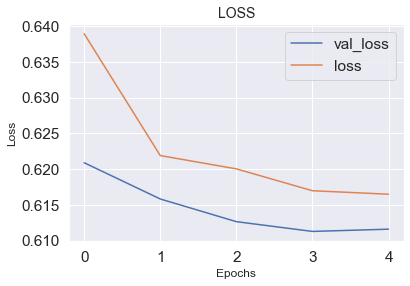

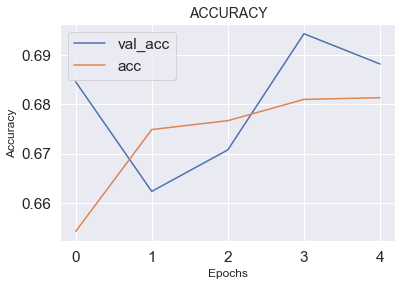

In [234]:
visualize_training_results(results1)

In [235]:
y_pred_m1 = model_1.predict(X_test)
y_pred_m1 =(y_pred_m1 > 0.5)

3612/3612 [==============================] - 6s 2ms/step


In [236]:
cm_m1 = confusion_matrix(y_test, y_pred_m1)
print(cm_m1)
print("------------------")
print(classification_report(y_test, y_pred_m1))

[[63477 11141]
 [24750 16185]]
------------------
              precision    recall  f1-score   support

         0.0       0.72      0.85      0.78     74618
         1.0       0.59      0.40      0.47     40935

    accuracy                           0.69    115553
   macro avg       0.66      0.62      0.63    115553
weighted avg       0.67      0.69      0.67    115553



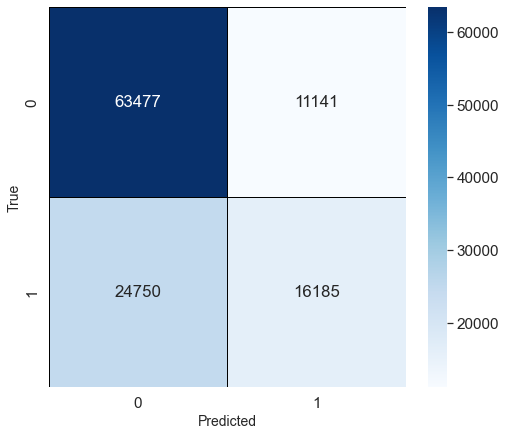

In [237]:
conf_matrix(cm_m1)

In [238]:
model_metrics(y_test, y_pred_m1)

Accuracy: 68.94 %
Precision score: 59.23 %
Recall score: 39.54 %
F1 score: 47.42 %


In [239]:
##Model 2
model_2 = Sequential()

model_2.add(Dense(30, activation='tanh', input_shape=(62,)))

model_2.add(Dense(10, activation='tanh'))

model_2.add(Dense(1, activation='sigmoid'))

In [240]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [241]:
results2 = model_2.fit(X_train, y_train, epochs=5, batch_size=12, validation_split=0.1)

Epoch 1/5
34666/34666 [==============================] - 87s 2ms/step - loss: 0.6278 - accuracy: 0.6690 - val_loss: 0.6237 - val_accuracy: 0.6801
Epoch 2/5
34666/34666 [==============================] - 95s 3ms/step - loss: 0.6230 - accuracy: 0.6732 - val_loss: 0.6324 - val_accuracy: 0.6791
Epoch 3/5
34666/34666 [==============================] - 79s 2ms/step - loss: 0.6205 - accuracy: 0.6764 - val_loss: 0.6337 - val_accuracy: 0.6770
Epoch 4/5
34666/34666 [==============================] - 81s 2ms/step - loss: 0.6161 - accuracy: 0.6837 - val_loss: 0.6164 - val_accuracy: 0.6947
Epoch 5/5
34666/34666 [==============================] - 82s 2ms/step - loss: 0.6151 - accuracy: 0.6841 - val_loss: 0.6187 - val_accuracy: 0.6853


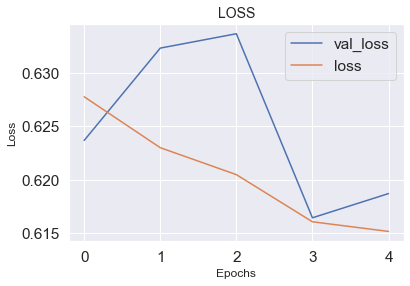

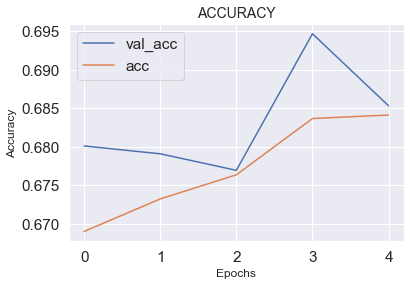

In [242]:
visualize_training_results(results2)

In [243]:
y_pred_m2 = model_2.predict(X_test)
y_pred_m2 =(y_pred_m1 > 0.5)

3612/3612 [==============================] - 6s 2ms/step


In [244]:
cm_m2 = confusion_matrix(y_test, y_pred_m2)
print(cm_m2)
print("------------------")
print(classification_report(y_test, y_pred_m2))

[[63477 11141]
 [24750 16185]]
------------------
              precision    recall  f1-score   support

         0.0       0.72      0.85      0.78     74618
         1.0       0.59      0.40      0.47     40935

    accuracy                           0.69    115553
   macro avg       0.66      0.62      0.63    115553
weighted avg       0.67      0.69      0.67    115553



In [245]:
## Model 3

model_3 = Sequential()

model_3.add(Dense(30, activation='relu', input_shape=(62,)))

model_3.add(Dense(10, activation='relu'))

model_3.add(Dense(5, activation='relu'))

model_3.add(Dense(1, activation='sigmoid'))

In [246]:
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [247]:
results3 = model_3.fit(X_train, y_train, epochs=5, batch_size=12, validation_split=0.1)

Epoch 1/5
34666/34666 [==============================] - 86s 2ms/step - loss: 0.6517 - accuracy: 0.6467 - val_loss: 0.6506 - val_accuracy: 0.6450
Epoch 2/5
34666/34666 [==============================] - 84s 2ms/step - loss: 0.6491 - accuracy: 0.6474 - val_loss: 0.6505 - val_accuracy: 0.6450
Epoch 3/5
34666/34666 [==============================] - 92s 3ms/step - loss: 0.6491 - accuracy: 0.6474 - val_loss: 0.6506 - val_accuracy: 0.6450
Epoch 4/5
34666/34666 [==============================] - 81s 2ms/step - loss: 0.6491 - accuracy: 0.6474 - val_loss: 0.6506 - val_accuracy: 0.6450
Epoch 5/5
34666/34666 [==============================] - 70s 2ms/step - loss: 0.6491 - accuracy: 0.6474 - val_loss: 0.6506 - val_accuracy: 0.6450


In [248]:
y_pred_m3 = model_3.predict(X_test)
y_pred_m3 =(y_pred_m3 > 0.5)

3612/3612 [==============================] - 6s 2ms/step


In [249]:
cm_m3 = confusion_matrix(y_test, y_pred_m3)
print(cm_m3)
print("------------------")
print(classification_report(y_test, y_pred_m3))

[[74618     0]
 [40935     0]]
------------------
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.78     74618
         1.0       0.00      0.00      0.00     40935

    accuracy                           0.65    115553
   macro avg       0.32      0.50      0.39    115553
weighted avg       0.42      0.65      0.51    115553



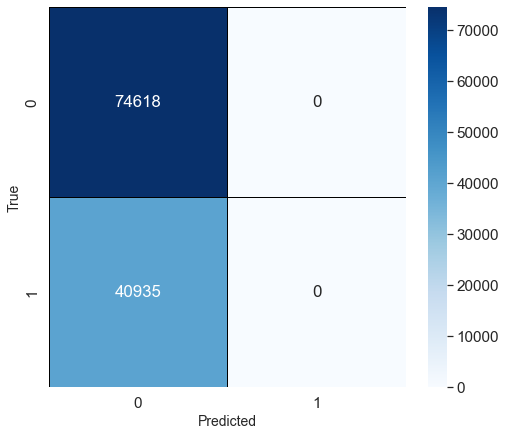

In [250]:
conf_matrix(cm_m3)

In [251]:
model_metrics(y_test, y_pred_m3)

Accuracy: 64.57 %
Precision score: 0.0 %
Recall score: 0.0 %
F1 score: 0.0 %


In [252]:
## Model 4

model_4 = Sequential()

model_4.add(Dense(30, activation='relu', input_shape=(62,)))

model_4.add(Dense(10, activation='relu'))

model_4.add(Dense(5, activation='relu'))

model_4.add(Dense(1, activation='sigmoid'))

In [253]:
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [254]:
results4 = model_4.fit(X_train, y_train, epochs=10, batch_size=12, validation_split=0.1)

Epoch 1/10
34666/34666 [==============================] - 93s 3ms/step - loss: 0.6509 - accuracy: 0.6470 - val_loss: 0.6505 - val_accuracy: 0.6450
Epoch 2/10
34666/34666 [==============================] - 79s 2ms/step - loss: 0.6491 - accuracy: 0.6474 - val_loss: 0.6505 - val_accuracy: 0.6450
Epoch 3/10
34666/34666 [==============================] - 80s 2ms/step - loss: 0.6491 - accuracy: 0.6474 - val_loss: 0.6505 - val_accuracy: 0.6450
Epoch 4/10
34666/34666 [==============================] - 81s 2ms/step - loss: 0.6491 - accuracy: 0.6474 - val_loss: 0.6507 - val_accuracy: 0.6450
Epoch 5/10
34666/34666 [==============================] - 82s 2ms/step - loss: 0.6491 - accuracy: 0.6474 - val_loss: 0.6511 - val_accuracy: 0.6450
Epoch 6/10
34666/34666 [==============================] - 91s 3ms/step - loss: 0.6491 - accuracy: 0.6474 - val_loss: 0.6505 - val_accuracy: 0.6450
Epoch 7/10
34666/34666 [==============================] - 88s 3ms/step - loss: 0.6491 - accuracy: 0.6474 - val_loss: 0

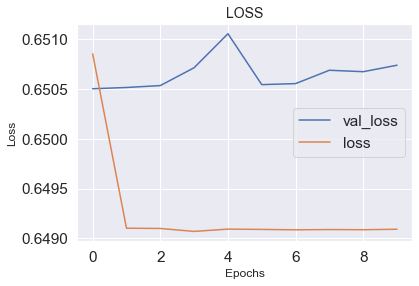

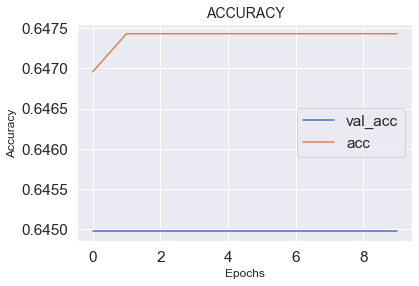

In [255]:
visualize_training_results(results4)

In [256]:
y_pred_m4 = model_4.predict(X_test)
y_pred_m4 =(y_pred_m4 > 0.5)

3612/3612 [==============================] - 7s 2ms/step


In [257]:
cm_m4 = confusion_matrix(y_test, y_pred_m4)
print(cm_m4)
print("------------------")
print(classification_report(y_test, y_pred_m4))

[[74618     0]
 [40935     0]]
------------------
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.78     74618
         1.0       0.00      0.00      0.00     40935

    accuracy                           0.65    115553
   macro avg       0.32      0.50      0.39    115553
weighted avg       0.42      0.65      0.51    115553



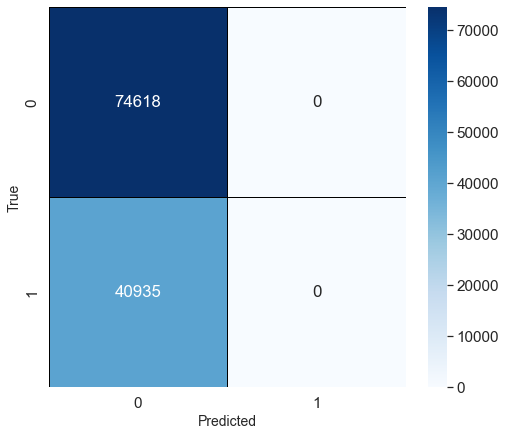

In [258]:
conf_matrix(cm_m4)

In [259]:
model_metrics(y_test, y_pred_m4)

Accuracy: 64.57 %
Precision score: 0.0 %
Recall score: 0.0 %
F1 score: 0.0 %


In [260]:
## Model 5

model_5 = Sequential()

model_5.add(Dense(30, activation='relu', input_shape=(62,)))

model_5.add(Dense(20, activation='relu'))

model_5.add(Dense(5, activation='relu'))

model_5.add(Dense(1, activation='sigmoid'))

In [261]:
model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [262]:
results5 = model_5.fit(X_train, y_train, epochs=2, batch_size=12, validation_split=0.1)

Epoch 1/2
34666/34666 [==============================] - 86s 2ms/step - loss: 0.6460 - accuracy: 0.6693 - val_loss: 0.5983 - val_accuracy: 0.6885
Epoch 2/2
34666/34666 [==============================] - 85s 2ms/step - loss: 0.5972 - accuracy: 0.6909 - val_loss: 0.5972 - val_accuracy: 0.6907


In [263]:
y_pred_m5 = model_5.predict(X_test)
y_pred_m5 =(y_pred_m1 > 0.5)

3612/3612 [==============================] - 8s 2ms/step


In [264]:
cm_m5 = confusion_matrix(y_test, y_pred_m5)
print(cm_m5)
print("------------------")
print(classification_report(y_test, y_pred_m5))

[[63477 11141]
 [24750 16185]]
------------------
              precision    recall  f1-score   support

         0.0       0.72      0.85      0.78     74618
         1.0       0.59      0.40      0.47     40935

    accuracy                           0.69    115553
   macro avg       0.66      0.62      0.63    115553
weighted avg       0.67      0.69      0.67    115553



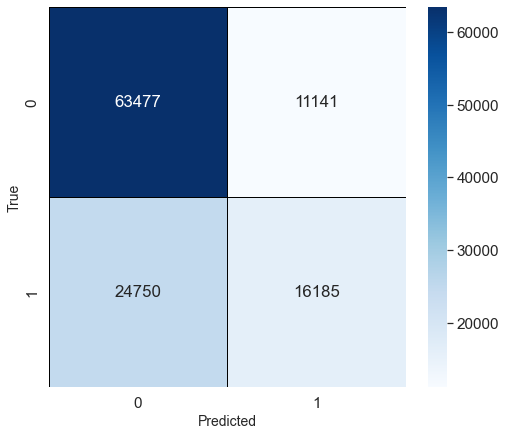

In [265]:
conf_matrix(cm_m5)

In [266]:
model_metrics(y_test, y_pred_m5)

Accuracy: 68.94 %
Precision score: 59.23 %
Recall score: 39.54 %
F1 score: 47.42 %
